In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('RealTime_IoT_PredictiveMaintenance_Dataset.csv')
data.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,RMS_Vibration,Peak_Vibration,Bearing_Temperature,Motor_Temperature,Gearbox_Temperature,Shaft_Alignment_Status,...,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability,Maintenance_Type_Label,Failure_Component_Class
0,2022-01-01 00:00:00,1.355758,0.380528,0.985488,1.011645,4.418049,102.473113,149.173645,34.670744,0,...,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08,Predictive,NaN
1,2022-01-01 00:01:00,1.337379,0.404044,0.355545,0.314294,3.677959,81.318873,101.113644,42.571560,0,...,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06,NaN,NaN
2,2022-01-01 00:02:00,0.582283,0.314004,0.644951,0.349514,4.743808,55.958593,125.162638,36.260415,0,...,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10,NaN,NaN
3,2022-01-01 00:03:00,1.190648,1.176260,0.784249,0.622507,3.963701,61.386165,127.900087,58.733609,0,...,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07,NaN,Bearing
4,2022-01-01 00:04:00,1.496976,0.242125,0.217077,0.315439,4.260820,67.239185,136.323282,32.449707,0,...,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11,Predictive,Bearing


In [19]:
data.shape

(1578241, 91)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578241 entries, 0 to 1578240
Data columns (total 91 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Timestamp                    1578241 non-null  object 
 1   Vibration_X                  1578241 non-null  float64
 2   Vibration_Y                  1578241 non-null  float64
 3   Vibration_Z                  1578241 non-null  float64
 4   RMS_Vibration                1578241 non-null  float64
 5   Peak_Vibration               1578241 non-null  float64
 6   Bearing_Temperature          1578241 non-null  float64
 7   Motor_Temperature            1578241 non-null  float64
 8   Gearbox_Temperature          1578241 non-null  float64
 9   Shaft_Alignment_Status       1578241 non-null  int64  
 10  Oil_Temperature              1578241 non-null  float64
 11  Oil_Viscosity                1578241 non-null  float64
 12  Oil_Particle_Count           1578241 non-n

In [21]:
data.isnull().sum()

Timestamp                        0
Vibration_X                      0
Vibration_Y                      0
Vibration_Z                      0
RMS_Vibration                    0
                            ...   
RUL                              0
TTF                              0
Failure_Probability              0
Maintenance_Type_Label      787970
Failure_Component_Class    1105416
Length: 91, dtype: int64

In [22]:
missing = data.isnull().sum()
for col, val in missing.items():
    print(f"{col}: {val}")

Timestamp: 0
Vibration_X: 0
Vibration_Y: 0
Vibration_Z: 0
RMS_Vibration: 0
Peak_Vibration: 0
Bearing_Temperature: 0
Motor_Temperature: 0
Gearbox_Temperature: 0
Shaft_Alignment_Status: 0
Oil_Temperature: 0
Oil_Viscosity: 0
Oil_Particle_Count: 0
Coolant_Temperature: 0
Coolant_Flow_Rate: 0
Acoustic_Emission_Level: 0
Ultrasonic_Signal_Strength: 0
Magnetic_Field_Strength: 0
Hydraulic_Pressure: 0
Pneumatic_Pressure: 0
Air_Flow_Rate: 0
Internal_Humidity: 0
Voltage_Phase_A: 0
Voltage_Phase_B: 0
Voltage_Phase_C: 0
Current_Phase_A: 0
Current_Phase_B: 0
Current_Phase_C: 0
Power_Factor: 0
Power_Consumption: 0
Energy_Efficiency_Index: 0
Shaft_Speed_RPM: 0
Load_Torque: 0
Machine_ID: 0
Machine_Type: 0
Production_Line_ID: 0
Operational_Mode: 0
Job_Code: 0
Cycle_Time: 0
Production_Rate: 0
Scrap_Rate: 0
Defective_Count: 0
Utilization_Percentage: 0
Tool_Change_Count: 0
Machine_Start_Stop_Cycles: 0
Time_Since_Last_Operation: 0
Tool_Wear_Level: 0
Workload_Percentage: 0
Idle_Time_Duration: 0
Last_Maintenanc

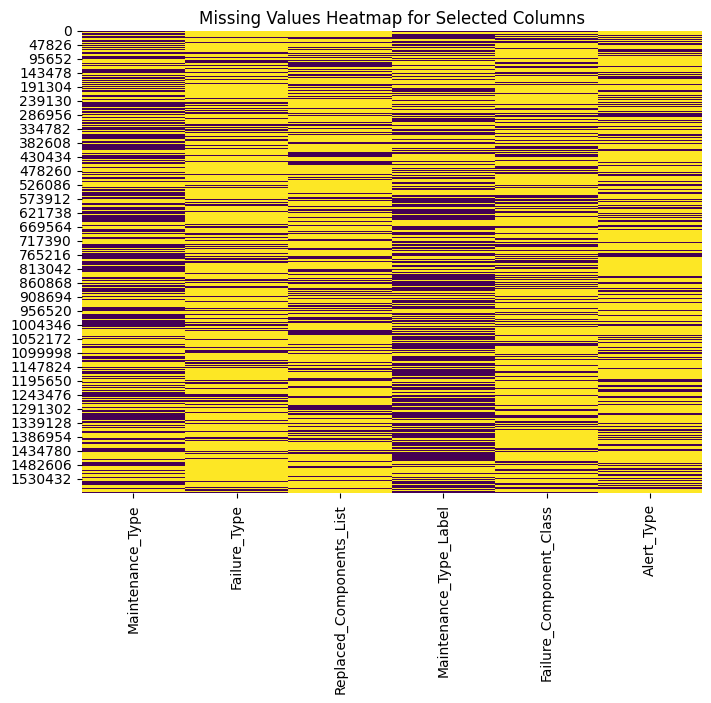

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_check = ['Maintenance_Type', 'Failure_Type', 'Replaced_Components_List', 'Maintenance_Type_Label','Failure_Component_Class','Alert_Type']

plt.figure(figsize=(8, 6))
sns.heatmap(data[cols_to_check].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Selected Columns')
plt.show()

In [23]:
cols_to_check = ['Maintenance_Type', 'Failure_Type', 'Replaced_Components_List', 'Maintenance_Type_Label','Failure_Component_Class','Alert_Type']
stats = data[cols_to_check].isnull().sum()
for col , val in stats.items():
    print(f"{col}: {val/data.shape[0]:.2%} missing values")

Maintenance_Type: 49.96% missing values
Failure_Type: 70.08% missing values
Replaced_Components_List: 69.97% missing values
Maintenance_Type_Label: 49.93% missing values
Failure_Component_Class: 70.04% missing values
Alert_Type: 69.98% missing values


In [24]:
for col in cols_to_check:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    for item in data[col].value_counts():
        print(f"{item/data.shape[0]:.2%} occurrences")
    print("===============================================")

Maintenance_Type: 3 unique values
Maintenance_Type
Preventive    473546
Predictive    158101
Corrective    158026
Name: count, dtype: int64
30.00% occurrences
10.02% occurrences
10.01% occurrences
Failure_Type: 3 unique values
Failure_Type
Electrical    157571
Mechanical    157521
Software      157150
Name: count, dtype: int64
9.98% occurrences
9.98% occurrences
9.96% occurrences
Replaced_Components_List: 3 unique values
Replaced_Components_List
Motor      158008
Sensor     158000
Bearing    157940
Name: count, dtype: int64
10.01% occurrences
10.01% occurrences
10.01% occurrences
Maintenance_Type_Label: 3 unique values
Maintenance_Type_Label
Preventive    474444
Predictive    158450
Corrective    157377
Name: count, dtype: int64
30.06% occurrences
10.04% occurrences
9.97% occurrences
Failure_Component_Class: 3 unique values
Failure_Component_Class
Bearing    158015
Gearbox    157449
Motor      157361
Name: count, dtype: int64
10.01% occurrences
9.98% occurrences
9.97% occurrences
Alert

In [25]:
data = data.drop(columns=['Maintenance_Type', 'Failure_Type', 'Replaced_Components_List','Maintenance_Type_Label','Failure_Component_Class','Alert_Type'])

In [26]:
missing = data.isnull().sum()
for col, val in missing.items():
    print(f"{col}: {val}")

Timestamp: 0
Vibration_X: 0
Vibration_Y: 0
Vibration_Z: 0
RMS_Vibration: 0
Peak_Vibration: 0
Bearing_Temperature: 0
Motor_Temperature: 0
Gearbox_Temperature: 0
Shaft_Alignment_Status: 0
Oil_Temperature: 0
Oil_Viscosity: 0
Oil_Particle_Count: 0
Coolant_Temperature: 0
Coolant_Flow_Rate: 0
Acoustic_Emission_Level: 0
Ultrasonic_Signal_Strength: 0
Magnetic_Field_Strength: 0
Hydraulic_Pressure: 0
Pneumatic_Pressure: 0
Air_Flow_Rate: 0
Internal_Humidity: 0
Voltage_Phase_A: 0
Voltage_Phase_B: 0
Voltage_Phase_C: 0
Current_Phase_A: 0
Current_Phase_B: 0
Current_Phase_C: 0
Power_Factor: 0
Power_Consumption: 0
Energy_Efficiency_Index: 0
Shaft_Speed_RPM: 0
Load_Torque: 0
Machine_ID: 0
Machine_Type: 0
Production_Line_ID: 0
Operational_Mode: 0
Job_Code: 0
Cycle_Time: 0
Production_Rate: 0
Scrap_Rate: 0
Defective_Count: 0
Utilization_Percentage: 0
Tool_Change_Count: 0
Machine_Start_Stop_Cycles: 0
Time_Since_Last_Operation: 0
Tool_Wear_Level: 0
Workload_Percentage: 0
Idle_Time_Duration: 0
Last_Maintenanc

In [27]:

cols_to_check = ['Timestamp', 'Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode', 'Job_Code',
                 'Last_Maintenance_Date', 'Maintenance_Frequency', 'Maintenance_Personnel_ID',
                 'Failure_Timestamp', 'Fault_Code', 'Diagnostic_Code', 'Shift_Code', 'Operator_ID', 'Machine_Location_Zone',
                 'Last_Reset_Timestamp','Error_Code_History']              

for col in cols_to_check:
    print(f"{col}: {data[col].nunique()} unique values")
    

Timestamp: 1578241 unique values
Machine_ID: 4 unique values
Machine_Type: 3 unique values
Production_Line_ID: 3 unique values
Operational_Mode: 3 unique values
Job_Code: 4 unique values
Last_Maintenance_Date: 1431 unique values
Maintenance_Frequency: 3 unique values
Maintenance_Personnel_ID: 3 unique values
Failure_Timestamp: 1097 unique values
Fault_Code: 4 unique values
Diagnostic_Code: 3 unique values
Shift_Code: 2 unique values
Operator_ID: 4 unique values
Machine_Location_Zone: 3 unique values
Last_Reset_Timestamp: 1097 unique values
Error_Code_History: 3 unique values


In [28]:
cols = ['Timestamp','Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp','Failure_Occurrence']
dt_0 = data[cols]
dt_0[dt_0['Failure_Occurrence'] == 0].head(n=5)

,Timestamp,Last_Maintenance_Date,Failure_Timestamp,Last_Reset_Timestamp,Failure_Occurrence
0,2022-01-01 00:00:00,2021-08-05,2022-11-02,2023-03-31,0
1,2022-01-01 00:01:00,2022-01-24,2023-03-15,2024-09-17,0
2,2022-01-01 00:02:00,2022-01-03,2024-03-05,2023-09-04,0
3,2022-01-01 00:03:00,2023-02-11,2024-01-27,2023-06-23,0
4,2022-01-01 00:04:00,2023-06-02,2023-10-26,2022-10-02,0


In [29]:
dt_0[dt_0['Failure_Occurrence'] == 1].head(n=5)

,Timestamp,Last_Maintenance_Date,Failure_Timestamp,Last_Reset_Timestamp,Failure_Occurrence
31,2022-01-01 00:31:00,2021-12-08,2023-01-02,2022-07-24,1
122,2022-01-01 02:02:00,2023-01-22,2022-07-05,2024-07-01,1
175,2022-01-01 02:55:00,2021-01-09,2022-12-30,2024-05-28,1
193,2022-01-01 03:13:00,2023-04-08,2022-11-21,2024-09-03,1
289,2022-01-01 04:49:00,2021-06-07,2023-07-13,2022-08-06,1


In [30]:
# we dont need these columns for further analysis  
cols = ['Failure_Timestamp','Last_Reset_Timestamp','Last_Maintenance_Date'] 
data.drop(columns=cols, inplace=True)

In [31]:

cols_to_check = ['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode', 'Job_Code', 'Maintenance_Frequency', 'Maintenance_Personnel_ID',
                 'Fault_Code', 'Diagnostic_Code', 'Shift_Code', 'Operator_ID', 'Machine_Location_Zone','Error_Code_History']              

for col in cols_to_check:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    for item in data[col].value_counts():
        print(f"{item/data.shape[0]:.2%} occurrences")
    print("===============================================")

Machine_ID: 4 unique values
Machine_ID
M001    946588
M002    315835
M003    237099
M004     78719
Name: count, dtype: int64
59.98% occurrences
20.01% occurrences
15.02% occurrences
4.99% occurrences
Machine_Type: 3 unique values
Machine_Type
CNC        1105235
Lathe       315077
Milling     157929
Name: count, dtype: int64
70.03% occurrences
19.96% occurrences
10.01% occurrences
Production_Line_ID: 3 unique values
Production_Line_ID
L1    1262121
L2     158354
L3     157766
Name: count, dtype: int64
79.97% occurrences
10.03% occurrences
10.00% occurrences
Operational_Mode: 3 unique values
Operational_Mode
Auto      946471
Manual    473660
Semi      158110
Name: count, dtype: int64
59.97% occurrences
30.01% occurrences
10.02% occurrences
Job_Code: 4 unique values
Job_Code
J101    788766
J202    315921
J303    315741
J404    157813
Name: count, dtype: int64
49.98% occurrences
20.02% occurrences
20.01% occurrences
10.00% occurrences
Maintenance_Frequency: 3 unique values
Maintenance_Freq

<Axes: xlabel='Machine_ID', ylabel='count'>

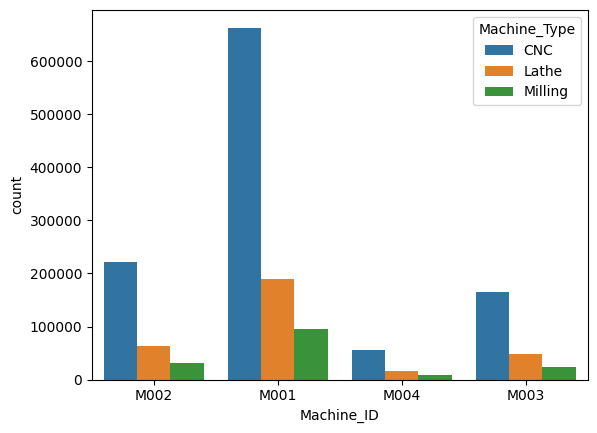

In [17]:
sns.countplot(x='Machine_ID', hue='Machine_Type', data=data)

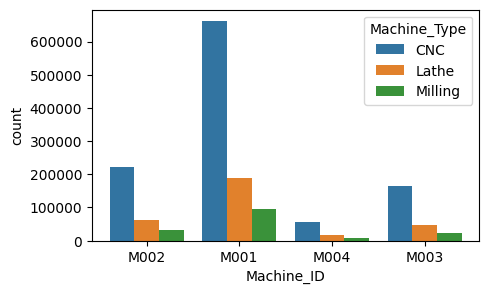

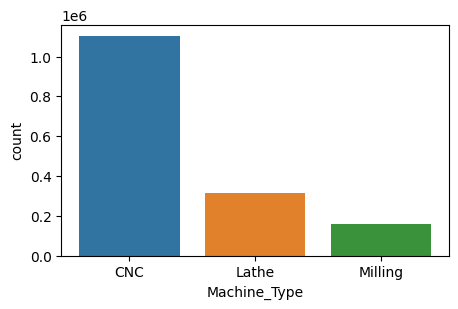

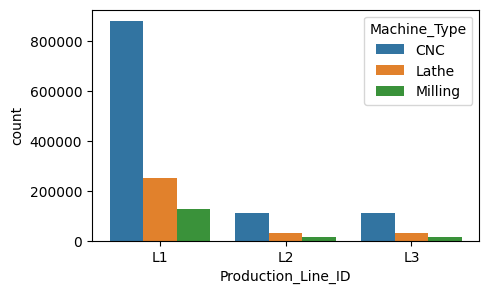

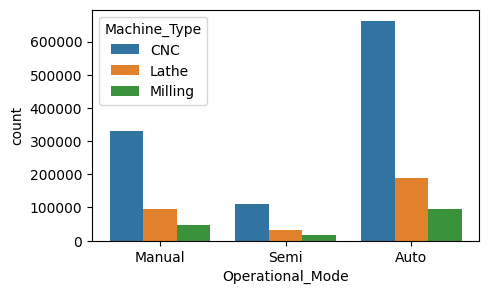

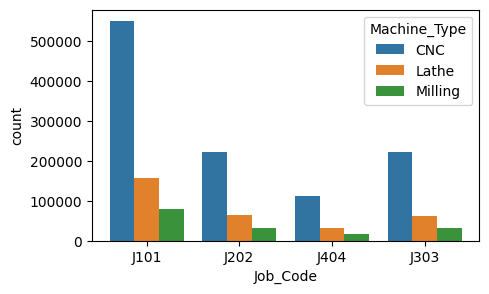

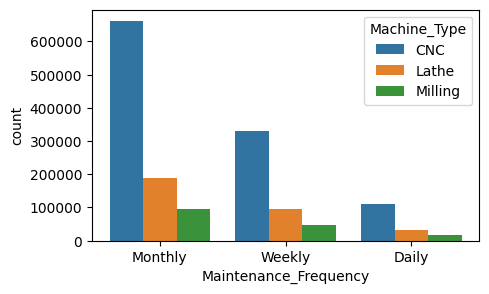

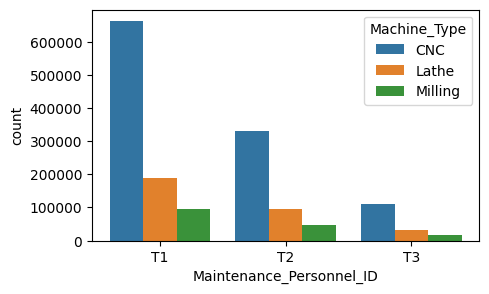

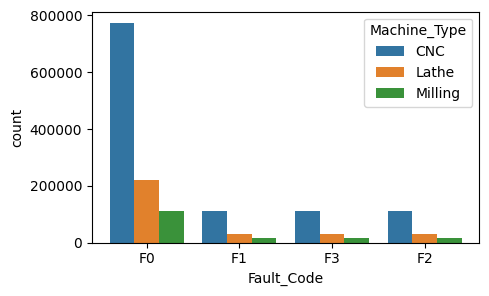

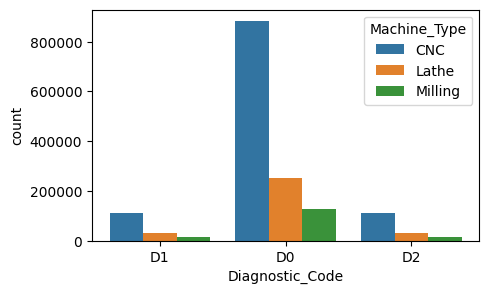

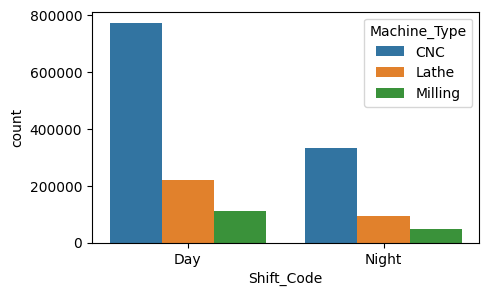

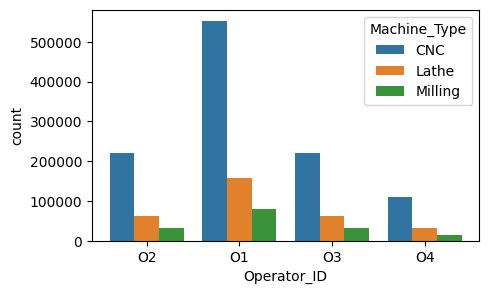

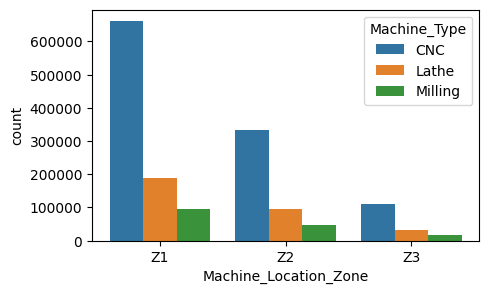

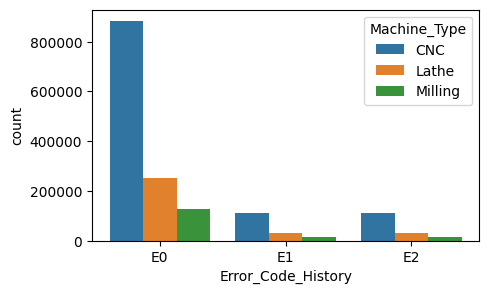

In [18]:
for col in cols_to_check:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col , hue='Machine_Type', data=data)
    plt.plot()

In [32]:
data.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,RMS_Vibration,Peak_Vibration,Bearing_Temperature,Motor_Temperature,Gearbox_Temperature,Shaft_Alignment_Status,...,Error_Code_History,Sensor_Ping_Rate,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability
0,2022-01-01 00:00:00,1.355758,0.380528,0.985488,1.011645,4.418049,102.473113,149.173645,34.670744,0,...,E0,3.951497,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08
1,2022-01-01 00:01:00,1.337379,0.404044,0.355545,0.314294,3.677959,81.318873,101.113644,42.571560,0,...,E0,2.526755,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06
2,2022-01-01 00:02:00,0.582283,0.314004,0.644951,0.349514,4.743808,55.958593,125.162638,36.260415,0,...,E0,3.684132,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10
3,2022-01-01 00:03:00,1.190648,1.176260,0.784249,0.622507,3.963701,61.386165,127.900087,58.733609,0,...,E0,1.173726,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07
4,2022-01-01 00:04:00,1.496976,0.242125,0.217077,0.315439,4.260820,67.239185,136.323282,32.449707,0,...,E1,5.231323,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11


In [33]:
cols_to_view = ['Failure_Occurrence','Failure_Probability', 'RUL', 'TTF',]
data[cols_to_view].head()

,Failure_Occurrence,Failure_Probability,RUL,TTF
0,0,0.08,220.143715,644.459528
1,0,0.06,84.931062,213.530770
2,0,0.10,35.771817,604.171796
3,0,0.07,19.095629,53.187254
4,0,0.11,136.622343,433.008236


In [34]:
failure = data[data['Failure_Probability'] > 0.5]
not_failure = data[data['Failure_Probability'] <= 0.5]
print(failure.shape[0], "rows with Failure_Probability > 0.5")
print(not_failure.shape[0], "rows with Failure_Probability <= 0.5")
data['Failure_Occurrence'].value_counts()

8584 rows with Failure_Probability > 0.5
1569657 rows with Failure_Probability <= 0.5


Failure_Occurrence
0    1546676
1      31565
Name: count, dtype: int64

In [35]:
def failure_y_n(row):
    if row['Failure_Probability'] >= 0.5:
        return 1
    else:
        return 0
    
failure = data.copy()
failure['Failure_Predicted'] = failure.apply(failure_y_n, axis=1)

print(failure['Failure_Predicted'].value_counts(),data['Failure_Occurrence'].value_counts())

Failure_Predicted
0    1567994
1      10247
Name: count, dtype: int64 Failure_Occurrence
0    1546676
1      31565
Name: count, dtype: int64


In [36]:
cols_to_view = ['Failure_Occurrence','Failure_Predicted', 'RUL', 'TTF']
def fail_occ_pred(data):
    if(data['Failure_Occurrence'] == data['Failure_Predicted']):
        return "same"
    else:
        return "not same"

failure['Fail_Occ_Pred'] = failure.apply(fail_occ_pred, axis=1)
print(failure['Fail_Occ_Pred'].value_counts())


Fail_Occ_Pred
same        1536857
not same      41384
Name: count, dtype: int64


In [37]:
# lets drop these column  and keep just one target column is data['Failure_Occurrence']
data = data.drop(columns = ['Failure_Probability', 'RUL', 'TTF'])

In [38]:
# Numerical columns: Near-zero variance
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
j = data[num_cols].var().sort_values()
for col , val in j.items():
    print(f"{col}: {val}")

Power_Factor: 0.01941279976945571
Failure_Occurrence: 0.019600121907935097
Shaft_Alignment_Status: 0.047652801226737936
Vibration_Z: 0.21735178538000138
Vibration_X: 0.21752463753000695
Vibration_Y: 0.2180812066179458
External_Vibration_Exposure: 0.2502360566529758
RMS_Vibration: 0.4007829038148056
Peak_Vibration: 2.2523252093399497
Edge_Processing_Time: 2.6675033995275697
Magnetic_Field_Strength: 2.667606131550179
Data_Packet_Loss_Percent: 2.7677675530402013
Scrap_Rate: 2.779981833526704
Sensor_Ping_Rate: 8.9766231893664
Ventilation_Level: 8.983264312245408
Alarm_Count_24hr: 11.087723210303277
Tool_Change_Count: 11.121118141676341
Defective_Count: 44.34857482988116
Number_of_Past_Failures: 44.513265074833605
Coolant_Flow_Rate: 69.34840037799907
Ambient_Temperature: 100.12960383572313
Voltage_Phase_C: 177.70966632112234
Utilization_Percentage: 177.84532270168071
Voltage_Phase_B: 178.15947007040862
Voltage_Phase_A: 178.30585260816295
Production_Rate: 266.9693555672084
Energy_Efficiency_

In [39]:
# lest's drop first Timestamp in our case is not useful for our analysis
data = data.drop(columns=['Timestamp'])
# Categorical columns: High cardinality
cat_cols = data.select_dtypes(include=['object']).columns
print(data[cat_cols].nunique().sort_values())

Shift_Code                  2
Machine_Type                3
Production_Line_ID          3
Operational_Mode            3
Maintenance_Frequency       3
Maintenance_Personnel_ID    3
Diagnostic_Code             3
Machine_Location_Zone       3
Error_Code_History          3
Machine_ID                  4
Job_Code                    4
Fault_Code                  4
Operator_ID                 4
dtype: int64


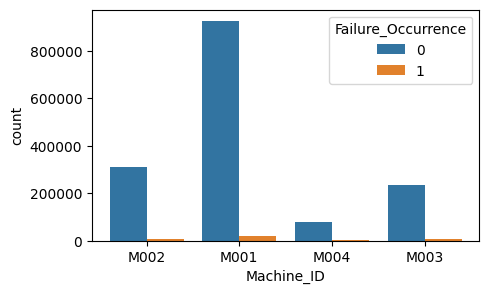

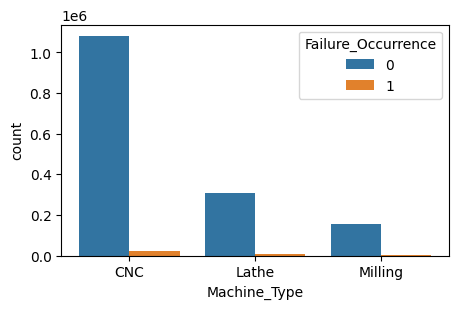

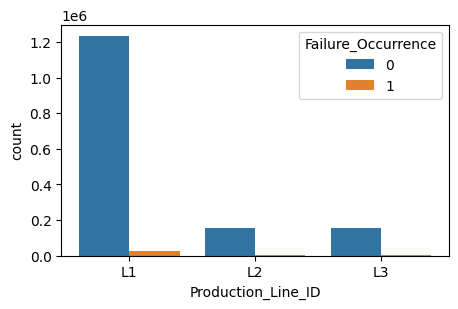

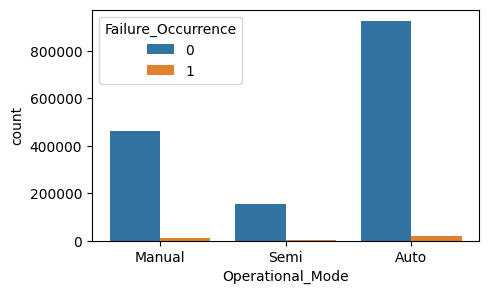

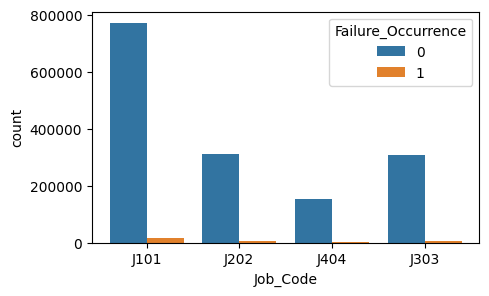

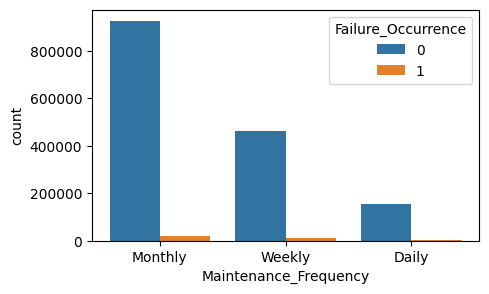

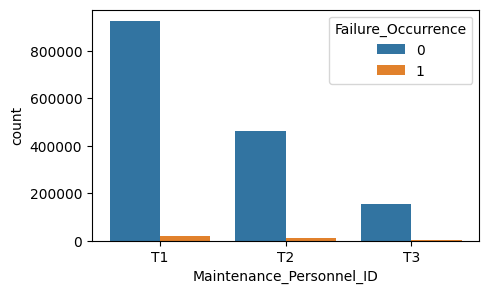

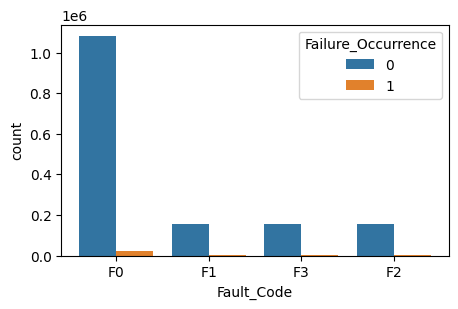

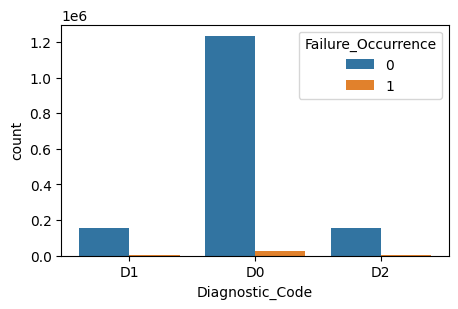

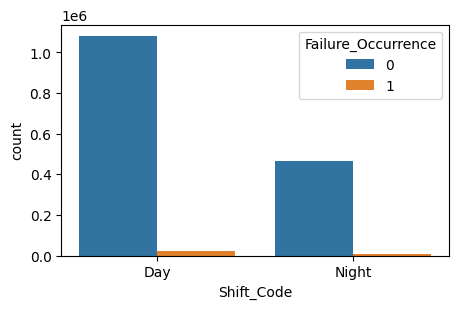

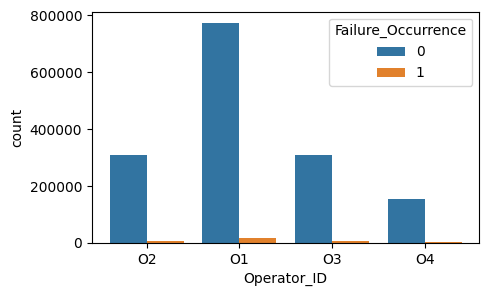

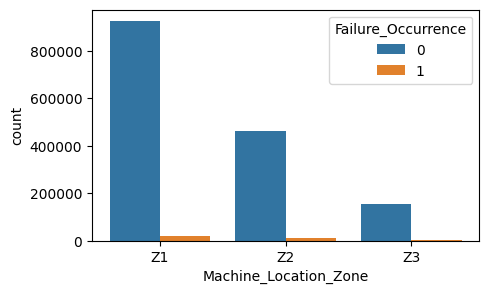

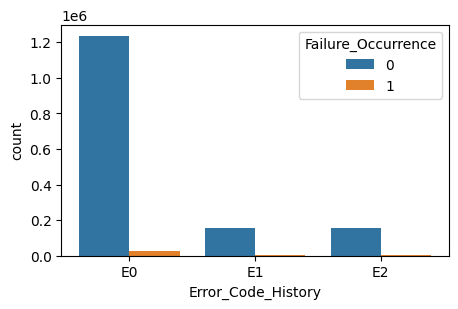

In [27]:
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col , hue='Failure_Occurrence', data=data)
    plt.plot()

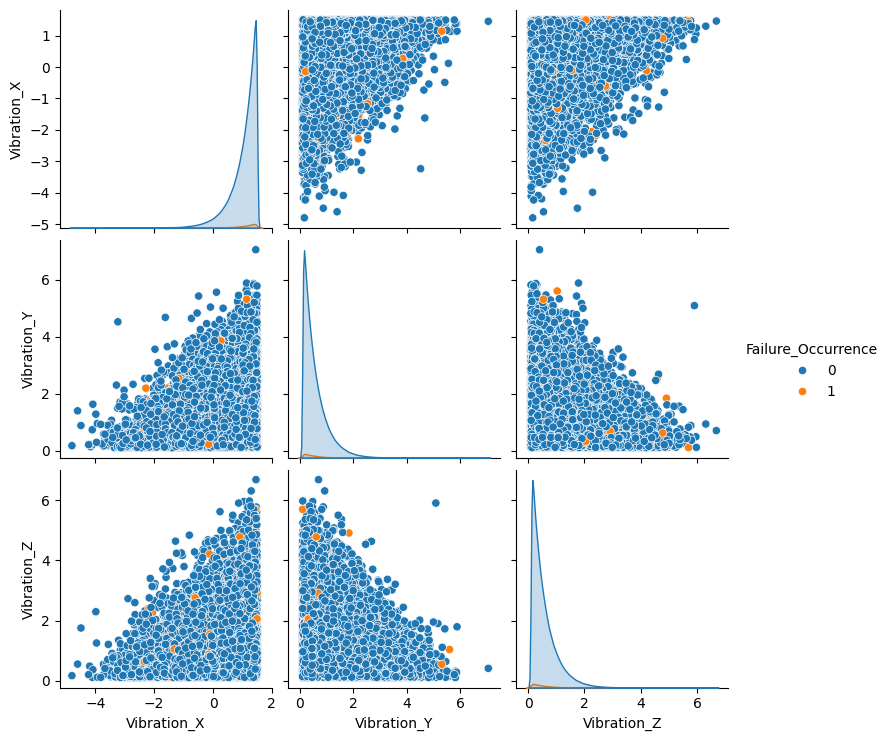

In [28]:
sns.pairplot(data[num_cols].iloc[:,:3].assign(Failure_Occurrence=data['Failure_Occurrence']),
             hue='Failure_Occurrence')
plt.show()

In [40]:
# For numerical features
num_corr = data[num_cols].apply(lambda x: x.corr(data['Failure_Occurrence']))
k = num_corr.abs().sort_values(ascending=False)
for col , val in k.items():
    print(f"{col}: {val:.4f}")

Failure_Occurrence: 1.0000
Peak_Vibration: 0.0025
Communication_Latency: 0.0019
Nearby_Machine_Load: 0.0018
Data_Packet_Loss_Percent: 0.0017
Alarm_Count_24hr: 0.0017
Voltage_Phase_A: 0.0015
Ambient_Humidity: 0.0014
Shaft_Alignment_Status: 0.0014
Load_Torque: 0.0013
Sensor_Ping_Rate: 0.0013
Lighting_Condition: 0.0013
RMS_Vibration: 0.0012
Maintenance_Duration: 0.0011
Vibration_Z: 0.0011
Ultrasonic_Signal_Strength: 0.0011
Power_Factor: 0.0011
Tool_Wear_Level: 0.0011
Production_Rate: 0.0011
Internal_Humidity: 0.0010
Ambient_Temperature: 0.0010
Time_Since_Last_Operation: 0.0010
Current_Phase_C: 0.0009
Magnetic_Field_Strength: 0.0009
Dust_Concentration: 0.0009
Defective_Count: 0.0008
Oil_Viscosity: 0.0008
Number_of_Past_Failures: 0.0008
Air_Flow_Rate: 0.0008
Tool_Change_Count: 0.0007
Time_Since_Last_Alert: 0.0007
Coolant_Flow_Rate: 0.0007
Event_Sequence_Number: 0.0007
Voltage_Phase_C: 0.0006
Voltage_Phase_B: 0.0006
Downtime_Duration: 0.0006
External_Vibration_Exposure: 0.0005
Oil_Particle_C

In [41]:
# For categorical features (use ANOVA F-value)
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
f_scores, _ = f_classif(data[cat_cols].apply(LabelEncoder().fit_transform), data['Failure_Occurrence'])
print(pd.DataFrame({'Feature': cat_cols, 'F_Score': f_scores}).sort_values('F_Score', ascending=False))

                     Feature   F_Score
3           Operational_Mode  3.699551
6   Maintenance_Personnel_ID  1.937229
9                 Shift_Code  1.189072
5      Maintenance_Frequency  0.806618
7                 Fault_Code  0.304343
2         Production_Line_ID  0.283678
8            Diagnostic_Code  0.248566
1               Machine_Type  0.127916
10               Operator_ID  0.072077
11     Machine_Location_Zone  0.040186
12        Error_Code_History  0.028029
0                 Machine_ID -0.017109
4                   Job_Code -0.022428


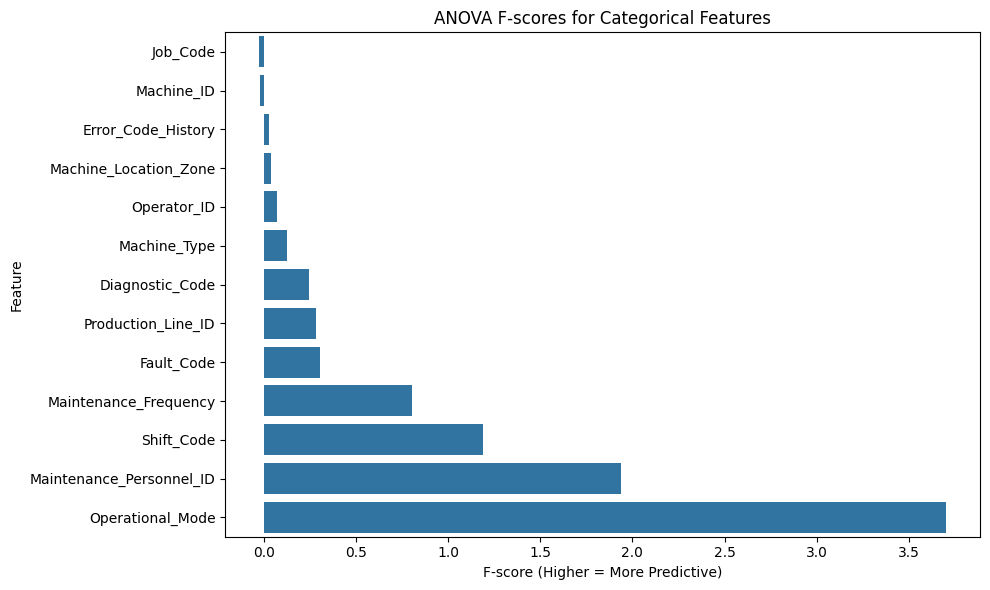

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
# Create DataFrame from your results
f_score_df = pd.DataFrame({
    'Feature': cat_cols,
    'F_Score': f_scores
}).sort_values('F_Score', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='F_Score', y='Feature', data=f_score_df)
plt.title('ANOVA F-scores for Categorical Features')
plt.xlabel('F-score (Higher = More Predictive)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Failure_Occurrence         0         1
Operational_Mode                      
Auto                0.980189  0.019811
Manual              0.979724  0.020276
Semi                0.979698  0.020302


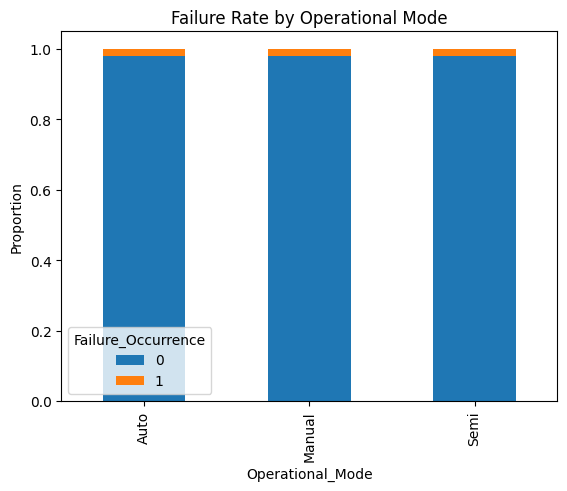

In [43]:
# Cross-tabulation with failure occurrence
op_mode_failure = pd.crosstab(data['Operational_Mode'], data['Failure_Occurrence'], normalize='index')
print(op_mode_failure)

# Visualization
op_mode_failure.plot(kind='bar', stacked=True)
plt.title('Failure Rate by Operational Mode')
plt.ylabel('Proportion')
plt.show()

In [44]:
data[cat_cols].head()

,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Maintenance_Frequency,Maintenance_Personnel_ID,Fault_Code,Diagnostic_Code,Shift_Code,Operator_ID,Machine_Location_Zone,Error_Code_History
0,M002,CNC,L1,Manual,J101,Monthly,T1,F0,D1,Day,O2,Z1,E0
1,M002,CNC,L1,Semi,J202,Weekly,T1,F0,D0,Day,O2,Z1,E0
2,M001,CNC,L1,Manual,J404,Weekly,T1,F1,D0,Day,O1,Z1,E0
3,M002,CNC,L1,Manual,J202,Weekly,T1,F1,D0,Night,O3,Z2,E0
4,M004,Lathe,L1,Auto,J101,Weekly,T1,F0,D0,Day,O2,Z1,E1


In [45]:
data[num_cols].value_counts().head(3)

Vibration_X  Vibration_Y  Vibration_Z  RMS_Vibration  Peak_Vibration  Bearing_Temperature  Motor_Temperature  Gearbox_Temperature  Shaft_Alignment_Status  Oil_Temperature  Oil_Viscosity  Oil_Particle_Count  Coolant_Temperature  Coolant_Flow_Rate  Acoustic_Emission_Level  Ultrasonic_Signal_Strength  Magnetic_Field_Strength  Hydraulic_Pressure  Pneumatic_Pressure  Air_Flow_Rate  Internal_Humidity  Voltage_Phase_A  Voltage_Phase_B  Voltage_Phase_C  Current_Phase_A  Current_Phase_B  Current_Phase_C  Power_Factor  Power_Consumption  Energy_Efficiency_Index  Shaft_Speed_RPM  Load_Torque  Cycle_Time  Production_Rate  Scrap_Rate  Defective_Count  Utilization_Percentage  Tool_Change_Count  Machine_Start_Stop_Cycles  Time_Since_Last_Operation  Tool_Wear_Level  Workload_Percentage  Idle_Time_Duration  Maintenance_Duration  Failure_Occurrence  Number_of_Past_Failures  Component_Health_Score  Downtime_Duration  Ambient_Temperature  Ambient_Humidity  Dust_Concentration  External_Vibration_Exposure  

In [46]:
pd.crosstab(data['Failure_Occurrence'], data['Shaft_Alignment_Status'], margins=True, margins_name="Total")

Shaft_Alignment_Status,0,1,Total
Failure_Occurrence,,,
0,1469014,77662,1546676
1,30047,1518,31565
Total,1499061,79180,1578241


In [47]:
# Check if codes appear in both failure and non-failure minutes
code_cooccurrence = data.groupby('Failure_Occurrence')[cat_cols].nunique()
print("Unique codes appearing in each class:")
code_cooccurrence

Unique codes appearing in each class:


,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Maintenance_Frequency,Maintenance_Personnel_ID,Fault_Code,Diagnostic_Code,Shift_Code,Operator_ID,Machine_Location_Zone,Error_Code_History
Failure_Occurrence,,,,,,,,,,,,,
0,4,3,3,3,4,3,3,4,3,2,4,3,3
1,4,3,3,3,4,3,3,4,3,2,4,3,3


# First Expirement :  
### we will not drop categorial features  (we are not sure yet that are some feature may lead to leakage of data)

In [48]:
data1 = data.copy()
data1.head()

,Vibration_X,Vibration_Y,Vibration_Z,RMS_Vibration,Peak_Vibration,Bearing_Temperature,Motor_Temperature,Gearbox_Temperature,Shaft_Alignment_Status,Oil_Temperature,...,Time_Since_Last_Alert,Alarm_Count_24hr,Event_Sequence_Number,Error_Code_History,Sensor_Ping_Rate,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time
0,1.355758,0.380528,0.985488,1.011645,4.418049,102.473113,149.173645,34.670744,0,26.006688,...,23.093605,5.739826,0,E0,3.951497,0.488340,243.132441,22.050737,11.519225,0.429975
1,1.337379,0.404044,0.355545,0.314294,3.677959,81.318873,101.113644,42.571560,0,27.755819,...,30.031290,0.034619,1,E0,2.526755,0.536935,228.774949,13.321208,108.617885,0.148077
2,0.582283,0.314004,0.644951,0.349514,4.743808,55.958593,125.162638,36.260415,0,23.655643,...,181.928619,1.158076,2,E0,3.684132,0.762119,256.522890,30.636135,66.783882,1.635098
3,1.190648,1.176260,0.784249,0.622507,3.963701,61.386165,127.900087,58.733609,0,74.376891,...,32.447681,0.569509,3,E0,1.173726,1.805923,211.643454,26.566515,15.175007,1.839353
4,1.496976,0.242125,0.217077,0.315439,4.260820,67.239185,136.323282,32.449707,0,39.237514,...,657.176429,1.568674,4,E1,5.231323,0.630864,75.388188,33.887337,39.157269,0.500300


In [50]:
data1 = pd.get_dummies(data1, columns=cat_cols, drop_first=True)

In [55]:
data1.shape

(1578241, 94)

In [56]:
X1 = data1.drop(columns=['Failure_Occurrence'])
y1 = data1['Failure_Occurrence']

In [63]:
#  that more realistic scenario, we would have a more balanced dataset (never expect in real world data to be balanced or easy to work with)
y1.value_counts()

Failure_Occurrence
0    1546676
1      31565
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original dataset shape %s" % Counter(y1))
sm = SMOTE(random_state=42)
X1, y1 = sm.fit_resample(X1, y1)
print("Resampled dataset shape %s" % Counter(y1))

Original dataset shape Counter({0: 1546676, 1: 31565})
Resampled dataset shape Counter({0: 1546676, 1: 1546676})


In [68]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, f1_score

### XGBClassifier

In [48]:
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X1_train, y1_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

\Initial Model Evaluation:
Accuracy: 0.9539076504313277
AUC-ROC: 0.9833740207390624
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    309219
           1       0.97      0.94      0.95    309452

    accuracy                           0.95    618671
   macro avg       0.95      0.95      0.95    618671
weighted avg       0.95      0.95      0.95    618671



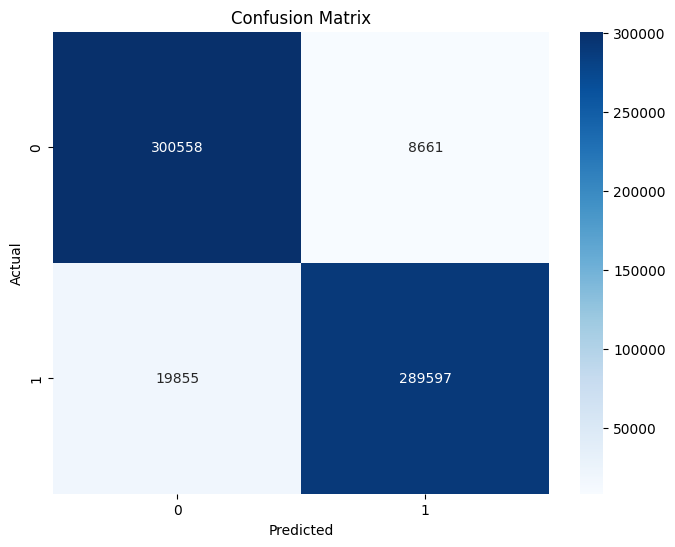

In [51]:
# Evaluate on test set
y1_pred = model.predict(X1_test)
y1_proba = model.predict_proba(X1_test)[:, 1]

print("\Initial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("Classification Report:")
print(classification_report(y1_test, y1_pred)) 

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

### RandomForestClassifier

In [52]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

\Initial Model Evaluation:
Accuracy: 0.9837005452009226
AUC-ROC: 0.9963517647550714
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    309219
           1       1.00      0.97      0.98    309452

    accuracy                           0.98    618671
   macro avg       0.98      0.98      0.98    618671
weighted avg       0.98      0.98      0.98    618671



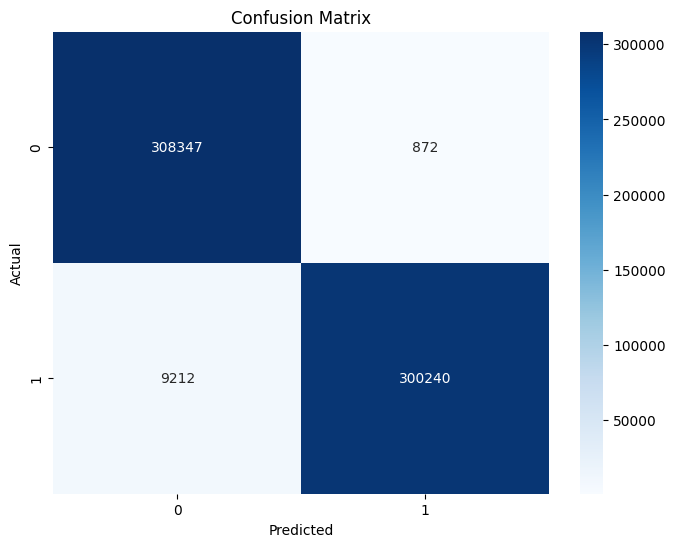

In [ ]:
# Evaluate on test set
y1_pred = model2.predict(X1_test)
y1_proba = model2.predict_proba(X1_test)[:, 1]

print("\Initial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("Classification Report:")
print(classification_report(y1_test, y1_pred)) 

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [ ]:
import joblib

# Save model to a file
model_path = './best_models/randomforest_model.pkl'
joblib.dump(model2, model_path)

model_path = './best_models/XGBClassifier_model.pkl'
joblib.dump(model, model_path)

print(f"\n✅ Models saved successfully at: {model_path}")


✅ Models saved successfully at: ./best_models/XGBClassifier1_model.pkl


###

### LGBMClassifier (Light Gradient Boosting Machine)

In [45]:
from lightgbm import LGBMClassifier

# Basic model with similar parameters to your XGBoost for a fair comparison
model3 = LGBMClassifier(
    random_state=42,
    n_estimators=100,
    verbosity=-1,  # Silences warnings, use 1 for info
    n_jobs=-1      # Uses all CPU cores
)

model3.fit(X1_train, y1_train)

LGBMClassifier(n_jobs=-1, random_state=42, verbosity=-1)

\Initial Model Evaluation:
Accuracy: 0.9468037131205439
AUC-ROC: 0.9813160073297026
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    309219
           1       0.98      0.92      0.95    309452

    accuracy                           0.95    618671
   macro avg       0.95      0.95      0.95    618671
weighted avg       0.95      0.95      0.95    618671



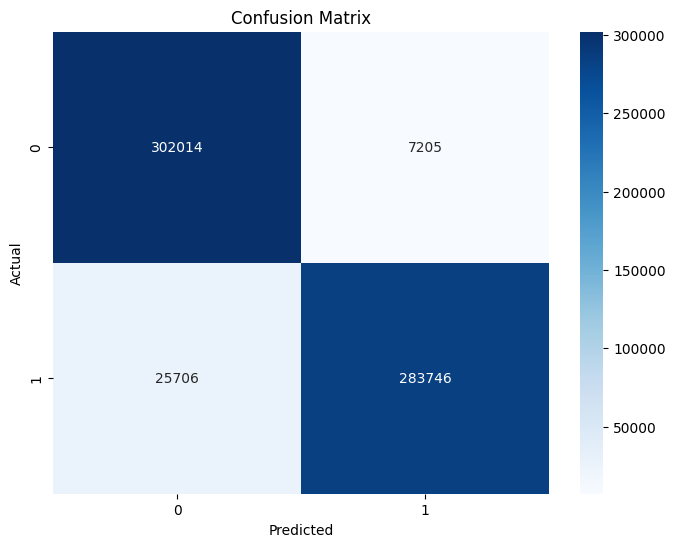

In [ ]:
# Evaluate on test set
y1_pred = model3.predict(X1_test)
y1_proba = model3.predict_proba(X1_test)[:, 1]

print("\Initial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("Classification Report:")
print(classification_report(y1_test, y1_pred)) 

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

### HistGradientBoostingClassifier

In [47]:
from sklearn.ensemble import HistGradientBoostingClassifier

model4 = HistGradientBoostingClassifier(
    random_state=42,
    max_iter=100,  # same as n_estimators in other models
    scoring='loss', # Early stopping metric
    early_stopping=True, # Very useful to prevent overfitting and save time
    validation_fraction=0.1,
    verbose=1       # Shows progress during training
)

# Note: This model handles early stopping automatically during .fit
# You may need to split your training data or provide a validation set explicitly.
model4.fit(X1_train, y1_train)

Binning 1.657 GB of training data: 6.157 s
Binning 0.184 GB of validation data: 0.429 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.65754, val loss: 0.65759, in 4.545s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.62826, val loss: 0.62835, in 0.879s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.60269, val loss: 0.60284, in 0.587s
[4/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.57824, val loss: 0.57840, in 0.546s
[5/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.55885, val loss: 0.55902, in 0.604s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.54078, val loss: 0.54103, in 0.514s
[7/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.52383, val loss: 0.52409, in 0.518s
[8/100] 1 tree, 31 leaves, max depth = 7, train loss: 0.51388, val loss: 0.51416, in 0.580s
[9/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.49914, val loss: 0.49939, in 0.572s
[10/100] 1 tree, 31 leaves, max depth = 9, train lo

HistGradientBoostingClassifier(early_stopping=True, random_state=42, verbose=1)

\Initial Model Evaluation:
Accuracy: 0.9466291453777533
AUC-ROC: 0.981239500824278
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    309219
           1       0.98      0.92      0.94    309452

    accuracy                           0.95    618671
   macro avg       0.95      0.95      0.95    618671
weighted avg       0.95      0.95      0.95    618671



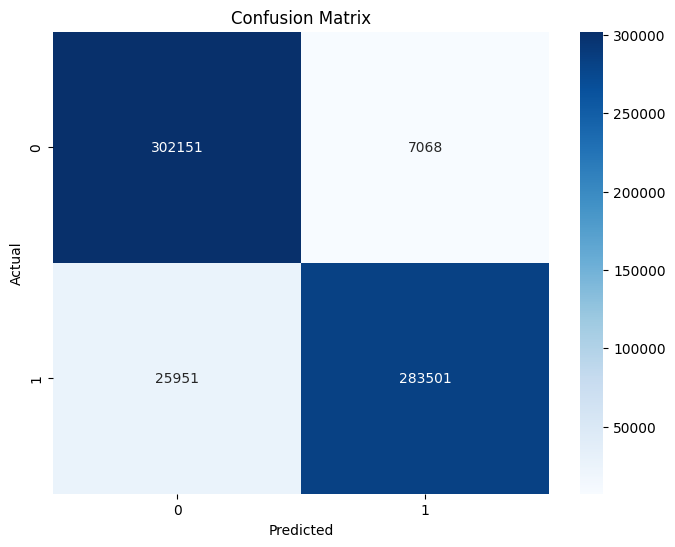

In [48]:
# Evaluate on test set
y1_pred = model4.predict(X1_test)
y1_proba = model4.predict_proba(X1_test)[:, 1]

print("\Initial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("Classification Report:")
print(classification_report(y1_test, y1_pred)) 

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

### Extra Trees Classifier (Extremely Randomized Trees)

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

model5 = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Uses all CPU cores
)

model5.fit(X1_train, y1_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

\Initial Model Evaluation:
Accuracy: 0.9887242169101186
AUC-ROC: 0.9947466987279797
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    309219
           1       1.00      0.98      0.99    309452

    accuracy                           0.99    618671
   macro avg       0.99      0.99      0.99    618671
weighted avg       0.99      0.99      0.99    618671



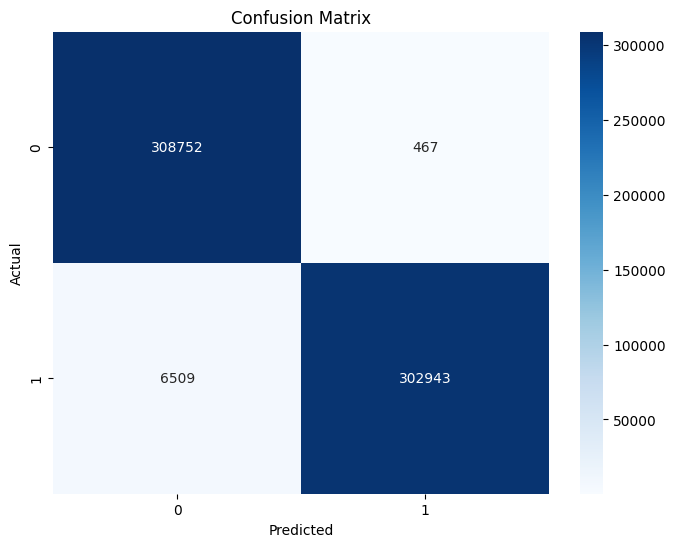

In [50]:
# Evaluate on test set
y1_pred = model5.predict(X1_test)
y1_proba = model5.predict_proba(X1_test)[:, 1]

print("\Initial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("Classification Report:")
print(classification_report(y1_test, y1_pred)) 

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [60]:
import joblib

# Save model to a file
model_path = './best_models/LGBMClassifier_model.pkl'
joblib.dump(model3, model_path)

model_path = './best_models/HistGradientBoostingClassifier_model.pkl'
joblib.dump(model4, model_path)

model_path = './best_models/ExtraTreesClassifier_model.pkl'
joblib.dump(model5, model_path)

print("✅ Models saved successfully")

✅ Models saved successfully


# Searching for the best hyperparameters

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.callbacks import VerboseCallback
from tqdm import tqdm

# Import all the classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [86]:
# Define a custom callback class for TQDM progress bars
class TQDMCallback:
    def __init__(self, total_iterations):
        self.pbar = tqdm(total=total_iterations, desc="Bayesian Optimization", unit="iter")
        
    def __call__(self, res):
        self.pbar.update(1)
        self.pbar.set_postfix({"Best Score": f"{res.best_score_:.4f}" if hasattr(res, 'best_score_') else "N/A"})
        
    def close(self):
        self.pbar.close()

# Define the number of iterations for the search
n_iter = 15

## XGBoost Classifier

In [48]:
# 1. XGBoost Classifier
print("\n" + "="*50)
print("Tuning XGBoost Classifier...")
print("="*50)

xgb_param_space = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 0.5),
    'min_child_weight': Integer(1, 10),
    'reg_alpha': Real(1e-5, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-5, 1.0, prior='log-uniform')
}

xgb_search = BayesSearchCV(
    estimator=XGBClassifier( eval_metric='logloss', random_state=42, n_jobs=-1),
    search_spaces=xgb_param_space,
    n_iter=n_iter,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,  # Set to 1 to avoid nested parallelism
    random_state=42,
    verbose=0
)

tqdm_cb_xgb = TQDMCallback(total_iterations=n_iter)
xgb_search.fit(X1_train, y1_train, callback=[tqdm_cb_xgb, VerboseCallback(n_total=n_iter)])
tqdm_cb_xgb.close()



Tuning XGBoost Classifier...


Bayesian Optimization:   0%|          | 0/15 [00:00<?, ?iter/s]

Iteration No: 1 started. Searching for the next optimal point.


Bayesian Optimization:   7%|▋         | 1/15 [02:59<41:51, 179.36s/iter, Best Score=N/A]

Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 179.3679
Function value obtained: -0.9842
Current minimum: -0.9842
Iteration No: 2 started. Searching for the next optimal point.


Bayesian Optimization:  13%|█▎        | 2/15 [05:41<36:42, 169.41s/iter, Best Score=N/A]

Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 162.4418
Function value obtained: -0.9804
Current minimum: -0.9842
Iteration No: 3 started. Searching for the next optimal point.


Bayesian Optimization:  20%|██        | 3/15 [09:15<37:53, 189.48s/iter, Best Score=N/A]

Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 213.3650
Function value obtained: -0.9739
Current minimum: -0.9842
Iteration No: 4 started. Searching for the next optimal point.


Bayesian Optimization:  27%|██▋       | 4/15 [11:42<31:39, 172.69s/iter, Best Score=N/A]

Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 146.9470
Function value obtained: -0.9841
Current minimum: -0.9842
Iteration No: 5 started. Searching for the next optimal point.


Bayesian Optimization:  33%|███▎      | 5/15 [17:02<37:39, 225.91s/iter, Best Score=N/A]

Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 320.2782
Function value obtained: -0.9861
Current minimum: -0.9861
Iteration No: 6 started. Searching for the next optimal point.


Bayesian Optimization:  40%|████      | 6/15 [25:06<47:03, 313.76s/iter, Best Score=N/A]

Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 484.2766
Function value obtained: -0.9662
Current minimum: -0.9861
Iteration No: 7 started. Searching for the next optimal point.


Bayesian Optimization:  47%|████▋     | 7/15 [30:23<41:59, 314.89s/iter, Best Score=N/A]

Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 317.2404
Function value obtained: -0.9847
Current minimum: -0.9861
Iteration No: 8 started. Searching for the next optimal point.


Bayesian Optimization:  53%|█████▎    | 8/15 [32:33<29:51, 255.95s/iter, Best Score=N/A]

Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 129.7443
Function value obtained: -0.9823
Current minimum: -0.9861
Iteration No: 9 started. Searching for the next optimal point.


Bayesian Optimization:  60%|██████    | 9/15 [34:50<21:52, 218.78s/iter, Best Score=N/A]

Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 137.0398
Function value obtained: -0.9843
Current minimum: -0.9861
Iteration No: 10 started. Searching for the next optimal point.


Bayesian Optimization:  67%|██████▋   | 10/15 [37:13<16:16, 195.37s/iter, Best Score=N/A]

Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 142.9448
Function value obtained: -0.9822
Current minimum: -0.9861
Iteration No: 11 started. Searching for the next optimal point.


Bayesian Optimization:  73%|███████▎  | 11/15 [45:38<19:19, 289.98s/iter, Best Score=N/A]

Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 504.4988
Function value obtained: -0.9954
Current minimum: -0.9954
Iteration No: 12 started. Searching for the next optimal point.


Bayesian Optimization:  80%|████████  | 12/15 [52:18<16:11, 323.68s/iter, Best Score=N/A]

Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 400.7664
Function value obtained: -0.9935
Current minimum: -0.9954
Iteration No: 13 started. Searching for the next optimal point.


Bayesian Optimization:  87%|████████▋ | 13/15 [55:05<09:12, 276.19s/iter, Best Score=N/A]

Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 166.9240
Function value obtained: -0.9915
Current minimum: -0.9954
Iteration No: 14 started. Searching for the next optimal point.


Bayesian Optimization:  93%|█████████▎| 14/15 [1:04:16<05:59, 359.06s/iter, Best Score=N/A]

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 550.5487
Function value obtained: -0.9827
Current minimum: -0.9954
Iteration No: 15 started. Searching for the next optimal point.


Bayesian Optimization: 100%|██████████| 15/15 [1:08:21<00:00, 324.80s/iter, Best Score=N/A]

Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 245.3975
Function value obtained: -0.9831
Current minimum: -0.9954


Bayesian Optimization: 100%|██████████| 15/15 [1:12:20<00:00, 289.40s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('colsample_bytree', 0.6), ('gamma', 0.1805826419719974), ('learning_rate', 0.29999999999999993), ('max_depth', 10), ('min_child_weight', 2), ('n_estimators', 500), ('reg_alpha', 1e-05), ('reg_lambda', 0.00029194283314169897), ('subsample', 1.0)])

Initial Model Evaluation:
Accuracy: 0.9859230511855251
AUC-ROC: 0.9966445791858336

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    309219
           1       0.99      0.98      0.99    309452

    accuracy                           0.99    618671
   macro avg       0.99      0.99      0.99    618671
weighted avg       0.99      0.99      0.99    618671



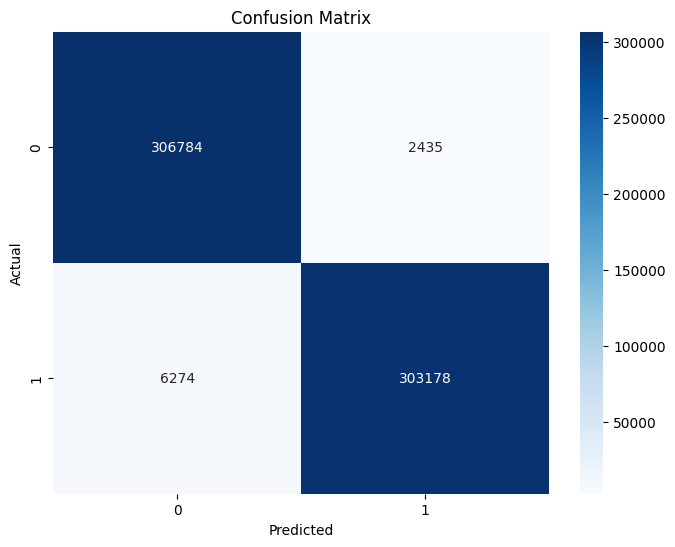

In [49]:
# Best model after Bayesian Optimization
model6 = xgb_search.best_estimator_

print("\nBest Parameters Found:")
print(xgb_search.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model6.predict(X1_test)
y1_proba = model6.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [50]:
import joblib

# Save model to a file
model_path = './best_models/Tuning_XGBoost.pkl'
joblib.dump(model6, model_path)

['./best_models/Tuning_XGBoost.pkl']

## LightGBM Classifier

In [51]:
# 2. LightGBM Classifier
print("\n" + "="*50)
print("Tuning LightGBM Classifier...")
print("="*50)

lgbm_param_space = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'num_leaves': Integer(20, 150),  # Key parameter for LightGBM
    'max_depth': Integer(3, 12),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(1e-5, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-5, 1.0, prior='log-uniform'),
    'min_child_samples': Integer(5, 100)
}

lgbm_search = BayesSearchCV(
    estimator=LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
    search_spaces=lgbm_param_space,
    n_iter=n_iter,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42,
    verbose=0
)

tqdm_cb_lgbm = TQDMCallback(total_iterations=n_iter)
lgbm_search.fit(X1_train, y1_train, callback=[tqdm_cb_lgbm, VerboseCallback(n_total=n_iter)])
tqdm_cb_lgbm.close()




Tuning LightGBM Classifier...


Bayesian Optimization:   0%|          | 0/15 [00:00<?, ?iter/s]

Iteration No: 1 started. Searching for the next optimal point.


Bayesian Optimization:   7%|▋         | 1/15 [03:41<51:47, 221.95s/iter, Best Score=N/A]

Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 221.9514
Function value obtained: -0.9872
Current minimum: -0.9872
Iteration No: 2 started. Searching for the next optimal point.


Bayesian Optimization:  13%|█▎        | 2/15 [07:01<45:12, 208.63s/iter, Best Score=N/A]

Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 199.3146
Function value obtained: -0.9860
Current minimum: -0.9872
Iteration No: 3 started. Searching for the next optimal point.


Bayesian Optimization:  20%|██        | 3/15 [08:13<29:13, 146.14s/iter, Best Score=N/A]

Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 71.7599
Function value obtained: -0.9823
Current minimum: -0.9872
Iteration No: 4 started. Searching for the next optimal point.


Bayesian Optimization:  27%|██▋       | 4/15 [11:20<29:45, 162.33s/iter, Best Score=N/A]

Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 187.1558
Function value obtained: -0.9788
Current minimum: -0.9872
Iteration No: 5 started. Searching for the next optimal point.


Bayesian Optimization:  33%|███▎      | 5/15 [16:50<37:10, 223.01s/iter, Best Score=N/A]

Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 330.5980
Function value obtained: -0.9855
Current minimum: -0.9872
Iteration No: 6 started. Searching for the next optimal point.


Bayesian Optimization:  40%|████      | 6/15 [19:34<30:25, 202.82s/iter, Best Score=N/A]

Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 163.6432
Function value obtained: -0.9842
Current minimum: -0.9872
Iteration No: 7 started. Searching for the next optimal point.


Bayesian Optimization:  47%|████▋     | 7/15 [22:27<25:45, 193.13s/iter, Best Score=N/A]

Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 173.1570
Function value obtained: -0.9854
Current minimum: -0.9872
Iteration No: 8 started. Searching for the next optimal point.


Bayesian Optimization:  53%|█████▎    | 8/15 [24:22<19:38, 168.29s/iter, Best Score=N/A]

Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 115.1037
Function value obtained: -0.9844
Current minimum: -0.9872
Iteration No: 9 started. Searching for the next optimal point.


Bayesian Optimization:  60%|██████    | 9/15 [27:31<17:27, 174.62s/iter, Best Score=N/A]

Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 188.5349
Function value obtained: -0.9848
Current minimum: -0.9872
Iteration No: 10 started. Searching for the next optimal point.


Bayesian Optimization:  67%|██████▋   | 10/15 [30:56<15:19, 183.96s/iter, Best Score=N/A]

Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 204.8934
Function value obtained: -0.9865
Current minimum: -0.9872
Iteration No: 11 started. Searching for the next optimal point.


Bayesian Optimization:  73%|███████▎  | 11/15 [38:33<17:50, 267.54s/iter, Best Score=N/A]

Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 457.0505
Function value obtained: -0.9811
Current minimum: -0.9872
Iteration No: 12 started. Searching for the next optimal point.


Bayesian Optimization:  80%|████████  | 12/15 [41:28<11:58, 239.42s/iter, Best Score=N/A]

Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 175.1040
Function value obtained: -0.9620
Current minimum: -0.9872
Iteration No: 13 started. Searching for the next optimal point.


Bayesian Optimization:  87%|████████▋ | 13/15 [47:03<08:56, 268.42s/iter, Best Score=N/A]

Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 335.1506
Function value obtained: -0.9927
Current minimum: -0.9927
Iteration No: 14 started. Searching for the next optimal point.


Bayesian Optimization:  93%|█████████▎| 14/15 [51:26<04:26, 266.91s/iter, Best Score=N/A]

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 263.4100
Function value obtained: -0.9913
Current minimum: -0.9927
Iteration No: 15 started. Searching for the next optimal point.


Bayesian Optimization: 100%|██████████| 15/15 [54:32<00:00, 242.29s/iter, Best Score=N/A]

Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 185.2339
Function value obtained: -0.9876
Current minimum: -0.9927


Bayesian Optimization: 100%|██████████| 15/15 [56:56<00:00, 227.74s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('colsample_bytree', 0.9255146451611668), ('learning_rate', 0.29632758686004707), ('max_depth', 8), ('min_child_samples', 14), ('n_estimators', 483), ('num_leaves', 146), ('reg_alpha', 2.3685522574069708e-05), ('reg_lambda', 0.0848684694206752), ('subsample', 0.7545300970552653)])

Initial Model Evaluation:
Accuracy: 0.9775276358516886
AUC-ROC: 0.9935399445847625

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    309219
           1       0.98      0.97      0.98    309452

    accuracy                           0.98    618671
   macro avg       0.98      0.98      0.98    618671
weighted avg       0.98      0.98      0.98    618671



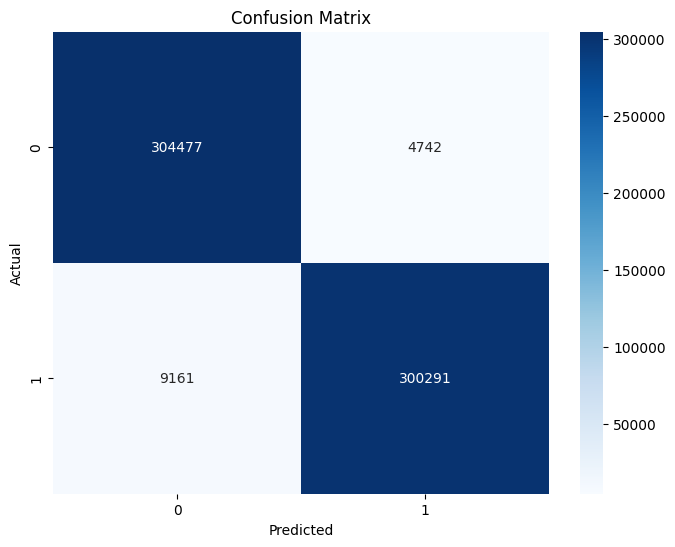

In [52]:
# Best model after Bayesian Optimization
model7 = lgbm_search.best_estimator_

print("\nBest Parameters Found:")
print(lgbm_search.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model7.predict(X1_test)
y1_proba = model7.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [53]:
# Save model to a file
model_path = './best_models/Tuning_LightGBM.pkl'
joblib.dump(model7, model_path)

['./best_models/Tuning_LightGBM.pkl']

## HistGradientBoosting Classifier

In [54]:
# 3. HistGradientBoosting Classifier
print("\n" + "="*50)
print("Tuning HistGradientBoosting Classifier...")
print("="*50)

hgb_param_space = {
    'max_iter': Integer(100, 500),  # Same as n_estimators
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 12),
    'min_samples_leaf': Integer(5, 100),
    'l2_regularization': Real(1e-5, 1.0, prior='log-uniform'),
    'max_bins': Integer(100, 255)  # Histogram-specific parameter
}

hgb_search = BayesSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42, early_stopping=False),
    search_spaces=hgb_param_space,
    n_iter=n_iter,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,  # This model can safely use n_jobs=-1
    random_state=42,
    verbose=0
)

tqdm_cb_hgb = TQDMCallback(total_iterations=n_iter)
hgb_search.fit(X1_train, y1_train, callback=[tqdm_cb_hgb, VerboseCallback(n_total=n_iter)])
tqdm_cb_hgb.close()


Tuning HistGradientBoosting Classifier...


Bayesian Optimization:   0%|          | 0/15 [00:00<?, ?iter/s]

Iteration No: 1 started. Searching for the next optimal point.


Bayesian Optimization:   7%|▋         | 1/15 [08:19<1:56:27, 499.14s/iter, Best Score=N/A]

Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 499.1523
Function value obtained: -0.9845
Current minimum: -0.9845
Iteration No: 2 started. Searching for the next optimal point.


Bayesian Optimization:  13%|█▎        | 2/15 [16:09<1:44:28, 482.18s/iter, Best Score=N/A]

Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 470.3039
Function value obtained: -0.9864
Current minimum: -0.9864
Iteration No: 3 started. Searching for the next optimal point.


Bayesian Optimization:  20%|██        | 3/15 [19:42<1:11:51, 359.33s/iter, Best Score=N/A]

Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 213.1235
Function value obtained: -0.9839
Current minimum: -0.9864
Iteration No: 4 started. Searching for the next optimal point.


Bayesian Optimization:  27%|██▋       | 4/15 [26:51<1:10:56, 386.93s/iter, Best Score=N/A]

Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 429.2425
Function value obtained: -0.9792
Current minimum: -0.9864
Iteration No: 5 started. Searching for the next optimal point.


Bayesian Optimization:  33%|███▎      | 5/15 [36:47<1:17:01, 462.13s/iter, Best Score=N/A]

Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 595.5097
Function value obtained: -0.9834
Current minimum: -0.9864
Iteration No: 6 started. Searching for the next optimal point.


Bayesian Optimization:  40%|████      | 6/15 [43:29<1:06:16, 441.81s/iter, Best Score=N/A]

Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 402.3230
Function value obtained: -0.9857
Current minimum: -0.9864
Iteration No: 7 started. Searching for the next optimal point.


Bayesian Optimization:  47%|████▋     | 7/15 [50:41<58:28, 438.57s/iter, Best Score=N/A]  

Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 431.8954
Function value obtained: -0.9850
Current minimum: -0.9864
Iteration No: 8 started. Searching for the next optimal point.


Bayesian Optimization:  53%|█████▎    | 8/15 [55:30<45:37, 391.03s/iter, Best Score=N/A]

Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 289.2563
Function value obtained: -0.9842
Current minimum: -0.9864
Iteration No: 9 started. Searching for the next optimal point.


Bayesian Optimization:  60%|██████    | 9/15 [1:00:33<36:21, 363.53s/iter, Best Score=N/A]

Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 303.0646
Function value obtained: -0.9835
Current minimum: -0.9864
Iteration No: 10 started. Searching for the next optimal point.


Bayesian Optimization:  67%|██████▋   | 10/15 [1:05:59<29:19, 351.83s/iter, Best Score=N/A]

Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 325.6354
Function value obtained: -0.9843
Current minimum: -0.9864
Iteration No: 11 started. Searching for the next optimal point.


Bayesian Optimization:  73%|███████▎  | 11/15 [1:14:01<26:06, 391.52s/iter, Best Score=N/A]

Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 481.5164
Function value obtained: -0.9883
Current minimum: -0.9883
Iteration No: 12 started. Searching for the next optimal point.


Bayesian Optimization:  80%|████████  | 12/15 [1:17:05<16:25, 328.44s/iter, Best Score=N/A]

Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 184.1651
Function value obtained: -0.9209
Current minimum: -0.9883
Iteration No: 13 started. Searching for the next optimal point.


Bayesian Optimization:  87%|████████▋ | 13/15 [1:28:42<14:40, 440.19s/iter, Best Score=N/A]

Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 697.3356
Function value obtained: -0.9834
Current minimum: -0.9883
Iteration No: 14 started. Searching for the next optimal point.


Bayesian Optimization:  93%|█████████▎| 14/15 [1:30:23<05:37, 337.87s/iter, Best Score=N/A]

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 101.4392
Function value obtained: -0.9811
Current minimum: -0.9883
Iteration No: 15 started. Searching for the next optimal point.


Bayesian Optimization: 100%|██████████| 15/15 [1:32:42<00:00, 277.67s/iter, Best Score=N/A]

Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 138.1781
Function value obtained: -0.9428
Current minimum: -0.9883


Bayesian Optimization: 100%|██████████| 15/15 [1:36:37<00:00, 386.53s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('l2_regularization', 1.0), ('learning_rate', 0.29999999999999993), ('max_bins', 100), ('max_depth', 12), ('max_iter', 500), ('min_samples_leaf', 100)])

Initial Model Evaluation:
Accuracy: 0.964271801975525
AUC-ROC: 0.9886060451301678

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    309219
           1       0.98      0.95      0.96    309452

    accuracy                           0.96    618671
   macro avg       0.96      0.96      0.96    618671
weighted avg       0.96      0.96      0.96    618671



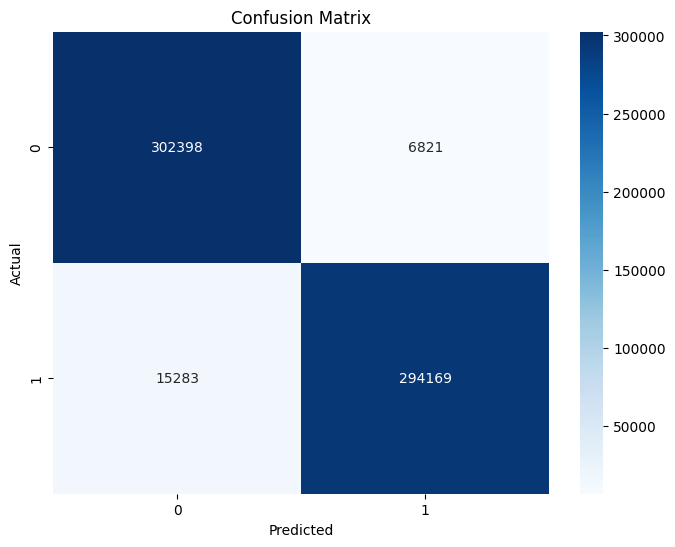

In [55]:
# Best model after Bayesian Optimization
model8 = hgb_search.best_estimator_

print("\nBest Parameters Found:")
print(hgb_search.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model8.predict(X1_test)
y1_proba = model8.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [57]:
# Save model to a file
model_path = './best_models/Tuning_HistGradientBoosting.pkl'
joblib.dump(model8, model_path)

['./best_models/Tuning_HistGradientBoosting.pkl']

## Random Forest Classifier - OPTIMIZED

In [59]:
### do this instead but it will take time +210 min per iteration
'''
# 4. Random Forest Classifier
print("\n" + "="*50)
print("Tuning Random Forest Classifier...")
print("="*50)

rf_param_space = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(5, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}

rf_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=rf_param_space,
    n_iter=n_iter,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42,
    verbose=0
)

tqdm_cb_rf = TQDMCallback(total_iterations=n_iter)
rf_search.fit(X1_train, y1_train, callback=[tqdm_cb_rf, VerboseCallback(n_total=n_iter)])
tqdm_cb_rf.close()
'''

'\n# 4. Random Forest Classifier\nprint("\n" + "="*50)\nprint("Tuning Random Forest Classifier...")\nprint("="*50)\n\nrf_param_space = {\n    \'n_estimators\': Integer(100, 300),\n    \'max_depth\': Integer(5, 20),\n    \'min_samples_split\': Integer(2, 20),\n    \'min_samples_leaf\': Integer(1, 10),\n    \'max_features\': Categorical([\'sqrt\', \'log2\', None]),\n    \'bootstrap\': Categorical([True, False])\n}\n\nrf_search = BayesSearchCV(\n    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),\n    search_spaces=rf_param_space,\n    n_iter=n_iter,\n    cv=3,\n    scoring=\'roc_auc\',\n    n_jobs=1,\n    random_state=42,\n    verbose=0\n)\n\ntqdm_cb_rf = TQDMCallback(total_iterations=n_iter)\nrf_search.fit(X1_train, y1_train, callback=[tqdm_cb_rf, VerboseCallback(n_total=n_iter)])\ntqdm_cb_rf.close()\n'

In [60]:
# 4. Random Forest Classifier - OPTIMIZED
print("\n" + "="*50)
print("Tuning Random Forest Classifier (Optimized Search)...")
print("="*50)

# Drastically reduced and simplified parameter space
rf_param_space_opt = {
    'n_estimators': Integer(50, 150),      # Much fewer trees
    'max_depth': Integer(8, 15),           # Reduced and practical depth range
    'min_samples_split': Integer(20, 50),  # Force much simpler trees
    'min_samples_leaf': Integer(10, 30),   # Force much simpler trees
    'max_features': Categorical(['sqrt']), # Only one option to test
    # REMOVED: 'bootstrap': Categorical([True, False])
}

rf_search_opt = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=rf_param_space_opt,
    n_iter=10,           # Reduced from 15
    cv=2,                # Reduced from 3 (uses 2-fold CV)
    scoring='roc_auc',
    n_jobs=1,            # Crucial for avoiding nested parallelism
    random_state=42,
    verbose=0
)

tqdm_cb_rf = TQDMCallback(total_iterations=10) # Update total for n_iter
rf_search_opt.fit(X1_train, y1_train, callback=[tqdm_cb_rf,VerboseCallback(n_total=10)])
tqdm_cb_rf.close()


Tuning Random Forest Classifier (Optimized Search)...


Iteration No: 1 started. Searching for the next optimal point.


Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 652.2722
Function value obtained: -0.9471
Current minimum: -0.9471
Iteration No: 2 started. Searching for the next optimal point.


Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 901.8985
Function value obtained: -0.9609
Current minimum: -0.9609
Iteration No: 3 started. Searching for the next optimal point.


Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 390.0790
Function value obtained: -0.9460
Current minimum: -0.9609
Iteration No: 4 started. Searching for the next optimal point.


Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 680.7861
Function value obtained: -0.9605
Current minimum: -0.9609
Iteration No: 5 started. Searching for the next optimal point.


Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 924.6838
Function value obtained: -0.9610
Current minimum: -0.9610
Iteration No: 6 started. Searching for the next optimal point.


Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 831.0907
Function value obtained: -0.9573
Current minimum: -0.9610
Iteration No: 7 started. Searching for the next optimal point.


Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 647.1813
Function value obtained: -0.9521
Current minimum: -0.9610
Iteration No: 8 started. Searching for the next optimal point.


Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 482.6343
Function value obtained: -0.9518
Current minimum: -0.9610
Iteration No: 9 started. Searching for the next optimal point.


Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 604.9947
Function value obtained: -0.9638
Current minimum: -0.9638
Iteration No: 10 started. Searching for the next optimal point.


Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 463.3788
Function value obtained: -0.9321
Current minimum: -0.9638


Bayesian Optimization: 100%|██████████| 10/10 [2:00:08<00:00, 720.80s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('max_depth', 15), ('max_features', 'sqrt'), ('min_samples_leaf', 27), ('min_samples_split', 32), ('n_estimators', 88)])

Initial Model Evaluation:
Accuracy: 0.9058417155483286
AUC-ROC: 0.9652587616550194

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91    309219
           1       0.94      0.87      0.90    309452

    accuracy                           0.91    618671
   macro avg       0.91      0.91      0.91    618671
weighted avg       0.91      0.91      0.91    618671



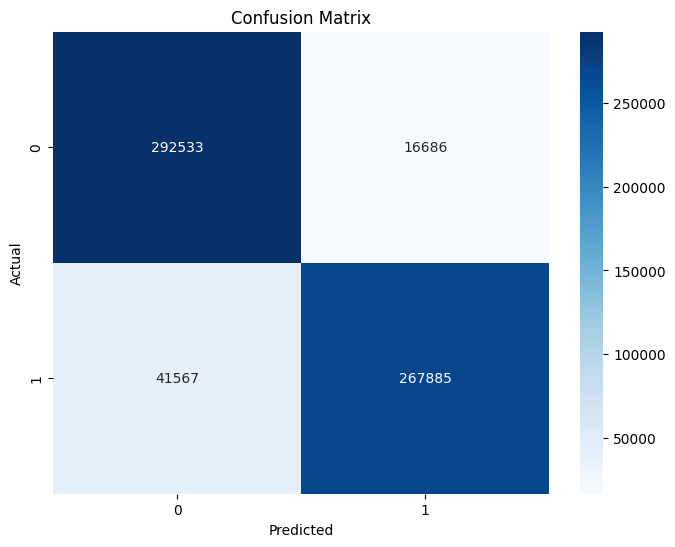

In [61]:
# Best model after Bayesian Optimization
model9 = rf_search_opt.best_estimator_

print("\nBest Parameters Found:")
print(rf_search_opt.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model9.predict(X1_test)
y1_proba = model9.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [62]:
# Save model to a file
model_path = './best_models/Tuning_randomf_delete.pkl'
joblib.dump(model9, model_path)

['./best_models/Tuning_randomf_delete.pkl']

## Random Forest Classifier - SURGICAL TUNING

In [63]:
# 4. Random Forest Classifier - SURGICAL TUNING
print("\n" + "="*60)
print("Surgical Tuning of Random Forest (Narrow Search)")
print("="*60)

# NARROW parameter space VERY CLOSE to the successful defaults
# We are only tweaking a few key parameters slightly
rf_param_space_surgical = {
    'n_estimators': Integer(80, 120),           # Tight range around default 100
    'max_depth': Categorical([None, 15, 20]),   # Test keeping it unlimited vs. a high cap
    'min_samples_split': Integer(2, 5),         # Very small range, keeping splits easy
    'min_samples_leaf': Integer(1, 3),          # Very small range, keeping leaves pure
    # 'max_features' is fixed at 'sqrt' (the default)
    # 'bootstrap' is fixed at True (the default)
}

rf_search_surgical = BayesSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_features='sqrt', # FIX these to their defaults, don't search over them
        bootstrap=True
    ),
    search_spaces=rf_param_space_surgical,
    n_iter=10,           # Few iterations are enough for a narrow space
    cv=2,                # Use 2-fold CV for speed, the signal will be clear
    scoring='roc_auc',   # We want to maximize AUC
    n_jobs=1,            # Crucial to avoid nested parallelism
    random_state=42,
    verbose=0
)

tqdm_cb_rf = TQDMCallback(total_iterations=10)
print("Starting SURGICAL Random Forest search...")
rf_search_surgical.fit(X1_train, y1_train, callback=[tqdm_cb_rf,VerboseCallback(n_total=10)])
tqdm_cb_rf.close()


Surgical Tuning of Random Forest (Narrow Search)


Starting SURGICAL Random Forest search...
Iteration No: 1 started. Searching for the next optimal point.


Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 982.7986
Function value obtained: -0.9666
Current minimum: -0.9666
Iteration No: 2 started. Searching for the next optimal point.


Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 1168.7768
Function value obtained: -0.9833
Current minimum: -0.9833
Iteration No: 3 started. Searching for the next optimal point.


Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 759.6368
Function value obtained: -0.9664
Current minimum: -0.9833
Iteration No: 4 started. Searching for the next optimal point.


Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 1093.9925
Function value obtained: -0.9840
Current minimum: -0.9840
Iteration No: 5 started. Searching for the next optimal point.


Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 1012.8854
Function value obtained: -0.9837
Current minimum: -0.9840
Iteration No: 6 started. Searching for the next optimal point.


Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 847.9841
Function value obtained: -0.9831
Current minimum: -0.9840
Iteration No: 7 started. Searching for the next optimal point.


Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 1384.9533
Function value obtained: -0.9665
Current minimum: -0.9840
Iteration No: 8 started. Searching for the next optimal point.


Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 1357.2032
Function value obtained: -0.9664
Current minimum: -0.9840
Iteration No: 9 started. Searching for the next optimal point.


Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 945.7236
Function value obtained: -0.9835
Current minimum: -0.9840
Iteration No: 10 started. Searching for the next optimal point.


Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 1092.6995
Function value obtained: -0.9922
Current minimum: -0.9922


Bayesian Optimization: 100%|██████████| 10/10 [3:17:27<00:00, 1184.71s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('max_depth', None), ('min_samples_leaf', 3), ('min_samples_split', 4), ('n_estimators', 90)])

Initial Model Evaluation:
Accuracy: 0.9798681366994736
AUC-ROC: 0.9951186945380112

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    309219
           1       1.00      0.96      0.98    309452

    accuracy                           0.98    618671
   macro avg       0.98      0.98      0.98    618671
weighted avg       0.98      0.98      0.98    618671



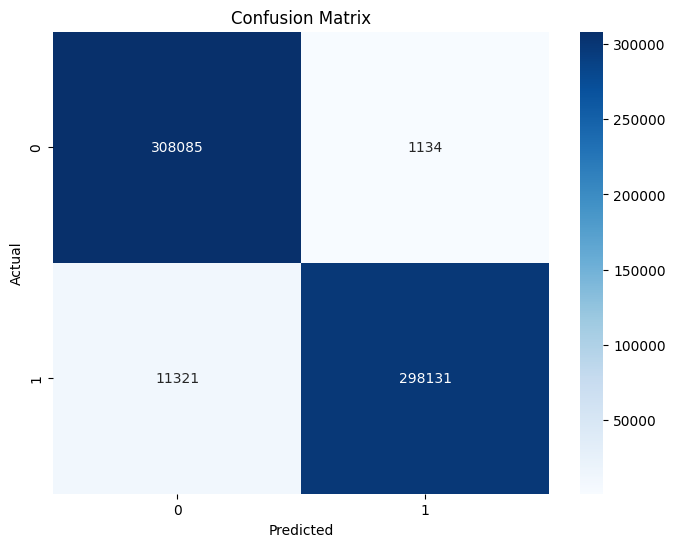

In [64]:
# Best model after Bayesian Optimization
model9_1 = rf_search_surgical.best_estimator_

print("\nBest Parameters Found:")
print(rf_search_surgical.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model9_1.predict(X1_test)
y1_proba = model9_1.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [65]:
# Save model to a file
model_path = './best_models/Tuning_randomf.pkl'
joblib.dump(model9_1, model_path)

['./best_models/Tuning_randomf.pkl']

## Extra Trees Classifier

In [66]:
# 5. Extra Trees Classifier
print("\n" + "="*50)
print("Tuning Extra Trees Classifier...")
print("="*50)

et_param_space = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(5, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}

et_search = BayesSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, n_jobs=-1),
    search_spaces=et_param_space,
    n_iter=n_iter,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42,
    verbose=0
)

tqdm_cb_et = TQDMCallback(total_iterations=n_iter)
et_search.fit(X1_train, y1_train, callback=[tqdm_cb_et, VerboseCallback(n_total=n_iter)])
tqdm_cb_et.close()


Tuning Extra Trees Classifier...


Iteration No: 1 started. Searching for the next optimal point.


Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 3201.4053
Function value obtained: -0.9507
Current minimum: -0.9507
Iteration No: 2 started. Searching for the next optimal point.


Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 395.9006
Function value obtained: -0.9624
Current minimum: -0.9624
Iteration No: 3 started. Searching for the next optimal point.


Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 533.7719
Function value obtained: -0.9672
Current minimum: -0.9672
Iteration No: 4 started. Searching for the next optimal point.


Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 150.9458
Function value obtained: -0.9301
Current minimum: -0.9672
Iteration No: 5 started. Searching for the next optimal point.


Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 435.5967
Function value obtained: -0.9446
Current minimum: -0.9672
Iteration No: 6 started. Searching for the next optimal point.


Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 638.6949
Function value obtained: -0.9683
Current minimum: -0.9683
Iteration No: 7 started. Searching for the next optimal point.


Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 537.8707
Function value obtained: -0.9583
Current minimum: -0.9683
Iteration No: 8 started. Searching for the next optimal point.


Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 296.9890
Function value obtained: -0.9633
Current minimum: -0.9683
Iteration No: 9 started. Searching for the next optimal point.


Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 3113.0703
Function value obtained: -0.9370
Current minimum: -0.9683
Iteration No: 10 started. Searching for the next optimal point.


Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 2429.2527
Function value obtained: -0.9586
Current minimum: -0.9683
Iteration No: 11 started. Searching for the next optimal point.


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 5200.6280
Function value obtained: -0.9768
Current minimum: -0.9768
Iteration No: 12 started. Searching for the next optimal point.


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1742.1713
Function value obtained: -0.9767
Current minimum: -0.9768
Iteration No: 13 started. Searching for the next optimal point.


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 393.8834
Function value obtained: -0.9681
Current minimum: -0.9768
Iteration No: 14 started. Searching for the next optimal point.


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1609.4433
Function value obtained: -0.8320
Current minimum: -0.9768
Iteration No: 15 started. Searching for the next optimal point.


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 836.4208
Function value obtained: -0.9740
Current minimum: -0.9768


Bayesian Optimization: 100%|██████████| 15/15 [6:44:28<00:00, 1617.92s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('bootstrap', True), ('max_depth', 20), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 300)])

Initial Model Evaluation:
Accuracy: 0.9383096993393905
AUC-ROC: 0.9783704015237499

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94    309219
           1       0.97      0.91      0.94    309452

    accuracy                           0.94    618671
   macro avg       0.94      0.94      0.94    618671
weighted avg       0.94      0.94      0.94    618671



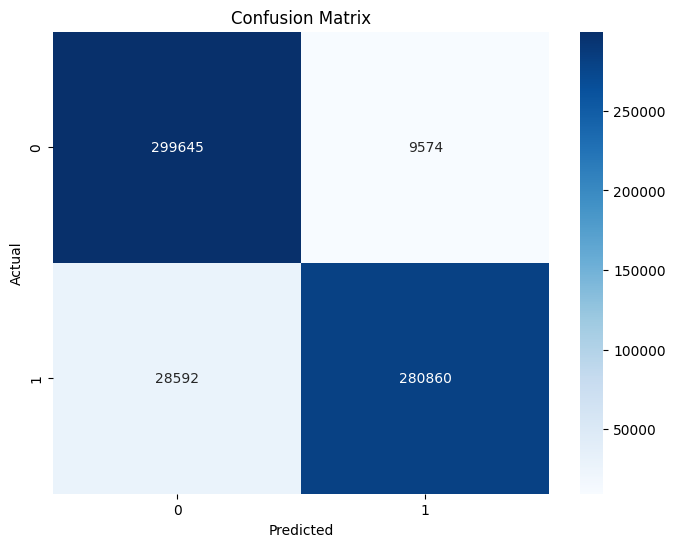

In [67]:
# Best model after Bayesian Optimization
model10 = et_search.best_estimator_

print("\nBest Parameters Found:")
print(et_search.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model10.predict(X1_test)
y1_proba = model10.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [68]:
# Save model to a file
model_path = './best_models/Tuning_Extra_Trees_delete.pkl'
joblib.dump(model10, model_path)

['./best_models/Tuning_Extra_Trees_delete.pkl']

## Extra Trees Classifier - SURGICAL TUNING

In [88]:
# 5. Extra Trees Classifier - SURGICAL TUNING
print("\n" + "="*60)
print("Surgical Tuning of Extra Trees (Narrow Search)")
print("="*60)

# NARROW parameter space VERY CLOSE to the successful defaults
# We are only tweaking a few key parameters slightly
et_param_space_surgical = {
    'n_estimators': Integer(80, 120),           # Tight range around default 100
    'max_depth': Categorical([None, 20, 25]),   # Test keeping it unlimited vs. a high cap
    'min_samples_split': Integer(2, 5),         # Very small range, keeping splits easy
    'min_samples_leaf': Integer(1, 3),          # Very small range, keeping leaves pure
    'max_features': Categorical(['sqrt']),      # FIXED to default 'sqrt'
    'bootstrap': Categorical([False])           # FIXED to default False
}

et_search_surgical = BayesSearchCV(
    estimator=ExtraTreesClassifier(
        random_state=42,
        n_jobs=-1,
        # max_features='sqrt',  # Now defined in search space
        # bootstrap=False       # Now defined in search space
    ),
    search_spaces=et_param_space_surgical,
    n_iter=10,           # Few iterations are enough for a narrow space
    cv=2,                # Use 2-fold CV for speed, the signal will be clear
    scoring='roc_auc',   # We want to maximize AUC
    n_jobs=1,            # Crucial to avoid nested parallelism
    random_state=42,
    verbose=0
)

tqdm_cb_et = TQDMCallback(total_iterations=10)
et_search_surgical.fit(X1_train, y1_train, callback=[tqdm_cb_et, VerboseCallback(n_total=10)])
tqdm_cb_et.close()


Surgical Tuning of Extra Trees (Narrow Search)



Bayesian Optimization:   0%|          | 0/10 [00:00<?, ?iter/s]

Iteration No: 1 started. Searching for the next optimal point.


Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 232.3853
Function value obtained: -0.9867
Current minimum: -0.9867
Iteration No: 2 started. Searching for the next optimal point.


Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 191.9299
Function value obtained: -0.9853
Current minimum: -0.9867
Iteration No: 3 started. Searching for the next optimal point.


Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 219.6240
Function value obtained: -0.9867
Current minimum: -0.9867
Iteration No: 4 started. Searching for the next optimal point.


Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 198.8266
Function value obtained: -0.9910
Current minimum: -0.9910
Iteration No: 5 started. Searching for the next optimal point.


Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 206.6036
Function value obtained: -0.9729
Current minimum: -0.9910
Iteration No: 6 started. Searching for the next optimal point.


Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 212.3667
Function value obtained: -0.9873
Current minimum: -0.9910
Iteration No: 7 started. Searching for the next optimal point.


Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 244.3769
Function value obtained: -0.9854
Current minimum: -0.9910
Iteration No: 8 started. Searching for the next optimal point.


Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 215.8216
Function value obtained: -0.9853
Current minimum: -0.9910
Iteration No: 9 started. Searching for the next optimal point.


Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 221.4046
Function value obtained: -0.9867
Current minimum: -0.9910
Iteration No: 10 started. Searching for the next optimal point.


Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 223.1405
Function value obtained: -0.9867
Current minimum: -0.9910


Bayesian Optimization: 100%|██████████| 10/10 [39:37<00:00, 237.73s/iter, Best Score=N/A]



Best Parameters Found:
OrderedDict([('bootstrap', False), ('max_depth', None), ('max_features', 'sqrt'), ('min_samples_leaf', 3), ('min_samples_split', 4), ('n_estimators', 84)])

Initial Model Evaluation:
Accuracy: 0.9849823250160424
AUC-ROC: 0.9935109412844855

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    309219
           1       1.00      0.97      0.98    309452

    accuracy                           0.98    618671
   macro avg       0.99      0.98      0.98    618671
weighted avg       0.99      0.98      0.98    618671



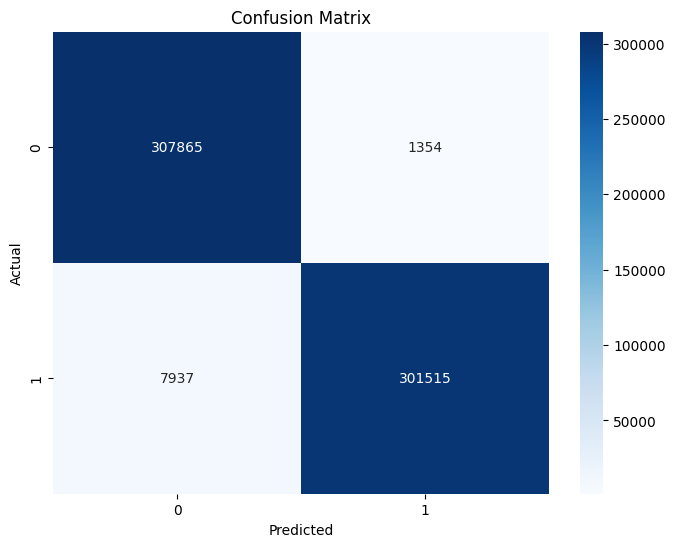

In [89]:
# Best model after Bayesian Optimization
model10_1 = et_search_surgical.best_estimator_

print("\nBest Parameters Found:")
print(et_search_surgical.best_params_)

# =============================
# 2. Evaluate on Test Set
# =============================
y1_pred = model10_1.predict(X1_test)
y1_proba = model10_1.predict_proba(X1_test)[:, 1]

print("\nInitial Model Evaluation:")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("AUC-ROC:", roc_auc_score(y1_test, y1_proba))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

# Print the confusion matrix
plot_confusion_matrix(y1_test, y1_pred)

In [91]:
import joblib
# Save model to a file
model_path = './best_models/Tuning_Extra_Trees.pkl'
joblib.dump(model10_1, model_path)

['./best_models/Tuning_Extra_Trees.pkl']

## ================= Evaluation Section ==================

In [43]:
import pandas as pd
import numpy as np
import joblib
import time
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 1. Load ALL Models from .pkl files using joblib
print("Loading all .pkl models using joblib...")
models = {}

# Load base models
model_files = {
    "Random Forest (Base)": "./best_models/randomforest_model.pkl",
    "Extra Trees (Base)": "./best_models/ExtraTreesClassifier_model.pkl", 
    "XGBoost (Base)": "./best_models/XGBClassifier_model.pkl",
    "LightGBM (Base)": "./best_models/LGBMClassifier_model.pkl",
    "Hist Gradient (Base)": "./best_models/HistGradientBoostingClassifier_model.pkl"
}

for name, file in model_files.items():
    try:
        models[name] = joblib.load(file)  # Use joblib to load .pkl files
        print(f"✓ Loaded {name} from {file}")
    except Exception as e:
        print(f"✗ Could not load {file}: {e}")

# Load tuned models (from BayesSearchCV)
tuned_files = {
    "Random Forest (Tuned)": "./best_models/Tuning_randomf.pkl",
    "Extra Trees (Tuned)": "./best_models/Tuning_Extra_Trees.pkl",
    "XGBoost (Tuned)": "./best_models/Tuning_XGBoost.pkl", 
    "LightGBM (Tuned)": "./best_models/Tuning_LightGBM.pkl",
    "Hist Gradient (Tuned)": "./best_models/Tuning_HistGradientBoosting.pkl"
}

for name, file in tuned_files.items():
    try:
        models[name] = joblib.load(file) # Use joblib to load .pkl files
        print(f"✓ Loaded {name} from {file}")
    except Exception as e:
        print(f"✗ Could not load {file}: {e}")

print(f"\nSuccessfully loaded {len(models)} models")
print("Available models:", list(models.keys()))

Loading all .pkl models using joblib...
✓ Loaded Random Forest (Base) from ./best_models/randomforest_model.pkl
✓ Loaded Extra Trees (Base) from ./best_models/ExtraTreesClassifier_model.pkl
✓ Loaded XGBoost (Base) from ./best_models/XGBClassifier_model.pkl
✓ Loaded LightGBM (Base) from ./best_models/LGBMClassifier_model.pkl
✓ Loaded Hist Gradient (Base) from ./best_models/HistGradientBoostingClassifier_model.pkl
✓ Loaded Random Forest (Tuned) from ./best_models/Tuning_randomf.pkl
✓ Loaded Extra Trees (Tuned) from ./best_models/Tuning_Extra_Trees.pkl
✓ Loaded XGBoost (Tuned) from ./best_models/Tuning_XGBoost.pkl
✓ Loaded LightGBM (Tuned) from ./best_models/Tuning_LightGBM.pkl
✓ Loaded Hist Gradient (Tuned) from ./best_models/Tuning_HistGradientBoosting.pkl

Successfully loaded 10 models
Available models: ['Random Forest (Base)', 'Extra Trees (Base)', 'XGBoost (Base)', 'LightGBM (Base)', 'Hist Gradient (Base)', 'Random Forest (Tuned)', 'Extra Trees (Tuned)', 'XGBoost (Tuned)', 'LightGBM 

In [66]:
# 2. Comprehensive Evaluation Function
import pickle
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and return metrics with timing"""
    results = {'model_name': model_name}
    
    # Time prediction for single sample (simulates real-time Kafka processing)
    start_time = time.time()
    try:
        # Convert to numpy array for faster prediction if it's a DataFrame
        if hasattr(X_test, 'iloc'):
            sample = X_test.iloc[0:1].values
        else:
            sample = X_test[0:1]
        _ = model.predict(sample)
        results['prediction_time_single_ms'] = (time.time() - start_time) * 1000
    except Exception as e:
        print(f"  Single prediction error for {model_name}: {e}")
        results['prediction_time_single_ms'] = None
    
    # Time prediction for batch
    start_time = time.time()
    try:
        y_pred = model.predict(X_test)
        results['prediction_time_batch_s'] = time.time() - start_time
    except Exception as e:
        print(f"  Batch prediction error for {model_name}: {e}")
        results['prediction_time_batch_s'] = None
        y_pred = None
    
    # Time probability prediction for batch
    start_time = time.time()
    try:
        y_pred_proba = model.predict_proba(X_test)
        results['prediction_time_proba_s'] = time.time() - start_time
    except Exception as e:
        print(f"  Probability prediction error for {model_name}: {e}")
        results['prediction_time_proba_s'] = None
        y_pred_proba = None
    
    # Calculate metrics if predictions were successful
    if y_pred is not None and y_pred_proba is not None:
        results['accuracy'] = accuracy_score(y_test, y_pred)
        results['precision'] = precision_score(y_test, y_pred, zero_division=0)
        results['recall'] = recall_score(y_test, y_pred, zero_division=0)
        results['f1'] = f1_score(y_test, y_pred, zero_division=0)
        results['roc_auc'] = roc_auc_score(y_test, y_pred_proba[:, 1])
        
        # Get class distribution for context
        unique, counts = np.unique(y_pred, return_counts=True)
        results['prediction_distribution'] = dict(zip(unique, counts))
    else:
        results['accuracy'] = results['precision'] = results['recall'] = results['f1'] = results['roc_auc'] = None
    
    # Model size (approximate)
    try:
        # Method 1: Try joblib.dumps first
        results['model_size_mb'] = len(joblib.dumps(model)) / (1024 * 1024)
    except:
        try:
            # Method 2: Try pickle as fallback
            results['model_size_mb'] = len(pickle.dumps(model)) / (1024 * 1024)
        except:
            results['model_size_mb'] = None
    
    return results

In [67]:
# 3. Evaluate ALL Models
print("\nEvaluating all models...")
all_results = []

for name, model in models.items():
    print(f"Evaluating {name}...")
    try:
        results = evaluate_model(model, X1_test, y1_test, name)
        all_results.append(results)
    except Exception as e:
        print(f"Error evaluating {name}: {e}")



Evaluating all models...
Evaluating Random Forest (Base)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluating Extra Trees (Base)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Evaluating XGBoost (Base)...
Evaluating LightGBM (Base)...
Evaluating Hist Gradient (Base)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


Evaluating Random Forest (Tuned)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluating Extra Trees (Tuned)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Evaluating XGBoost (Tuned)...
Evaluating LightGBM (Tuned)...
Evaluating Hist Gradient (Tuned)...


c:\Users\redag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [68]:
# 4. Create Comprehensive Comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df.set_index('model_name', inplace=True)

# Calculate additional metrics
if 'precision' in results_df.columns and 'recall' in results_df.columns:
    results_df['precision_recall_avg'] = (results_df['precision'] + results_df['recall']) / 2

if 'prediction_time_single_ms' in results_df.columns:
    results_df['inference_speed_score'] = 1 / results_df['prediction_time_single_ms']  # Higher is faster

# Sort by ROC AUC (primary metric) if available
if 'roc_auc' in results_df.columns:
    results_df = results_df.sort_values('roc_auc', ascending=False)

print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)
results_df.round(4)


COMPREHENSIVE MODEL COMPARISON


,prediction_time_single_ms,prediction_time_batch_s,prediction_time_proba_s,accuracy,precision,recall,f1,roc_auc,prediction_distribution,model_size_mb,precision_recall_avg,inference_speed_score
model_name,,,,,,,,,,,,
XGBoost (Tuned),203.6486,3.9070,3.6626,0.9859,0.9920,0.9797,0.9858,0.9966,"{0: 313058, 1: 305613}",15.6267,0.9859,0.0049
Random Forest (Base),212.0867,43.4097,34.0475,0.9837,0.9971,0.9702,0.9835,0.9964,"{0: 317559, 1: 301112}",1829.0171,0.9837,0.0047
Random Forest (Tuned),139.0679,9.9142,8.2721,0.9799,0.9962,0.9634,0.9795,0.9951,"{0: 319406, 1: 299265}",1334.2342,0.9798,0.0072
Extra Trees (Base),79.1309,15.2199,9.2801,0.9887,0.9985,0.9790,0.9886,0.9947,"{0: 315261, 1: 303410}",4059.4695,0.9887,0.0126
LightGBM (Tuned),59.6669,7.9524,7.5156,0.9775,0.9845,0.9704,0.9774,0.9935,"{0: 313638, 1: 305033}",7.2338,0.9774,0.0168
Extra Trees (Tuned),75.0403,11.7269,7.3972,0.9850,0.9955,0.9744,0.9848,0.9935,"{0: 315802, 1: 302869}",2718.4440,0.9849,0.0133
Hist Gradient (Tuned),45.8124,10.3545,9.6483,0.9643,0.9773,0.9506,0.9638,0.9886,"{0: 317681, 1: 300990}",1.7519,0.9640,0.0218
XGBoost (Base),458.5700,1.1494,0.5378,0.9539,0.9710,0.9358,0.9531,0.9834,"{0: 320413, 1: 298258}",0.4298,0.9534,0.0022
LightGBM (Base),45.0161,1.1710,1.1555,0.9468,0.9752,0.9169,0.9452,0.9813,"{0: 327720, 1: 290951}",0.3543,0.9461,0.0222


In [69]:
# 5. Detailed Analysis Output
print("\n" + "="*80)
print("DETAILED ANALYSIS & RECOMMENDATIONS")
print("="*80)

# Best by ROC AUC
if 'roc_auc' in results_df.columns and not results_df.empty:
    best_auc = results_df.iloc[0]
    print(f"🏆 BEST MODEL BY AUC: {best_auc.name}")
    print(f"   AUC: {best_auc['roc_auc']:.4f}, F1: {best_auc.get('f1', 'N/A'):.4f}")

# Best by Speed
if 'prediction_time_single_ms' in results_df.columns:
    fastest_model = results_df.loc[results_df['prediction_time_single_ms'].idxmin()]
    print(f"⚡ FASTEST MODEL: {fastest_model.name}")
    print(f"   Prediction Time: {fastest_model['prediction_time_single_ms']:.2f} ms")

# Best Balanced (AUC + Speed)
if 'roc_auc' in results_df.columns and 'inference_speed_score' in results_df.columns:
    results_df['balanced_score'] = (results_df['roc_auc'] * 0.7 + 
                                   results_df['inference_speed_score'] * 0.3)
    best_balanced = results_df.loc[results_df['balanced_score'].idxmax()]
    print(f"⭐ BEST BALANCED MODEL: {best_balanced.name}")
    print(f"   AUC: {best_balanced['roc_auc']:.4f}, Speed: {best_balanced['prediction_time_single_ms']:.2f} ms")


DETAILED ANALYSIS & RECOMMENDATIONS
🏆 BEST MODEL BY AUC: XGBoost (Tuned)
   AUC: 0.9966, F1: 0.9858
⚡ FASTEST MODEL: Hist Gradient (Base)
   Prediction Time: 35.02 ms
⭐ BEST BALANCED MODEL: LightGBM (Tuned)
   AUC: 0.9935, Speed: 59.67 ms


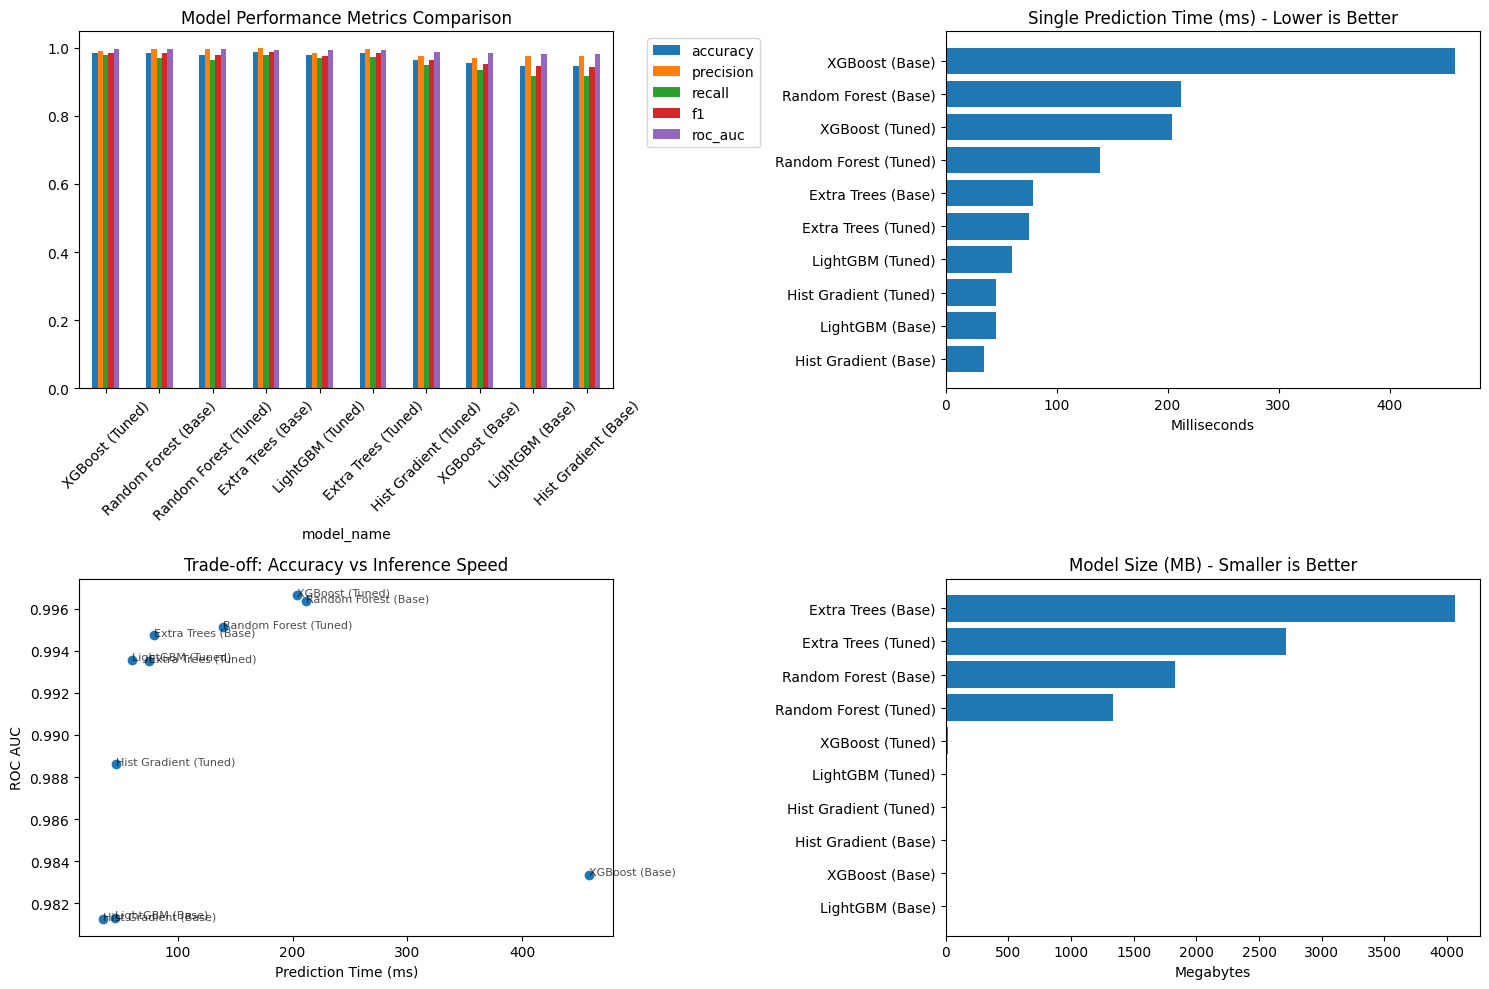

In [70]:
# 6. Visualization
if not results_df.empty:
    # Create the main figure once
    fig = plt.figure(figsize=(15, 10))
    
    # Plot 1: Model Performance Comparison
    ax1 = plt.subplot(2, 2, 1)
    performance_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    available_metrics = [m for m in performance_metrics if m in results_df.columns]
    
    if available_metrics:
        results_df[available_metrics].plot(kind='bar', ax=ax1)
        ax1.set_title('Model Performance Metrics Comparison')
        ax1.tick_params(axis='x', rotation=45)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot 2: Inference Speed Comparison
    ax2 = plt.subplot(2, 2, 2)
    if 'prediction_time_single_ms' in results_df.columns:
        speed_df = results_df.sort_values('prediction_time_single_ms')
        ax2.barh(speed_df.index, speed_df['prediction_time_single_ms'])
        ax2.set_title('Single Prediction Time (ms) - Lower is Better')
        ax2.set_xlabel('Milliseconds')
    
    # Plot 3: AUC vs Speed Scatter
    ax3 = plt.subplot(2, 2, 3)
    if 'roc_auc' in results_df.columns and 'prediction_time_single_ms' in results_df.columns:
        scatter = ax3.scatter(results_df['prediction_time_single_ms'], results_df['roc_auc'])
        for i, txt in enumerate(results_df.index):
            ax3.annotate(txt, (results_df['prediction_time_single_ms'].iloc[i], 
                              results_df['roc_auc'].iloc[i]), 
                        fontsize=8, alpha=0.7)
        ax3.set_xlabel('Prediction Time (ms)')
        ax3.set_ylabel('ROC AUC')
        ax3.set_title('Trade-off: Accuracy vs Inference Speed')
    
    # Plot 4: Model Size Comparison
    ax4 = plt.subplot(2, 2, 4)
    if 'model_size_mb' in results_df.columns and results_df['model_size_mb'].notna().any():
        size_df = results_df.dropna(subset=['model_size_mb']).sort_values('model_size_mb')
        ax4.barh(size_df.index, size_df['model_size_mb'])
        ax4.set_title('Model Size (MB) - Smaller is Better')
        ax4.set_xlabel('Megabytes')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [81]:
# 7. Final Recommendation Table
print("\n" + "="*80)
print("FINAL RECOMMENDATION SUMMARY")
print("="*80)

# Select relevant columns for recommendation
recommendation_cols = ['roc_auc', 'f1', 'prediction_time_single_ms', 'model_size_mb']
available_cols = [col for col in recommendation_cols if col in results_df.columns]

if available_cols:
    recommendation_df = results_df[available_cols].copy()
    recommendation_df['recommendation_rank'] = range(1, len(recommendation_df) + 1)
    
    # Create deployment priority based on REAL-TIME constraints
    if 'roc_auc' in recommendation_df.columns and 'prediction_time_single_ms' in recommendation_df.columns and 'model_size_mb' in recommendation_df.columns:
        recommendation_df['deployment_priority'] = recommendation_df.apply(
            lambda x: '🚀 PRODUCTION READY' if (x['roc_auc'] > 0.99 and 
                                               x['prediction_time_single_ms'] < 100 and 
                                               x['model_size_mb'] < 500) else 
                      '✅ STAGING READY' if (x['roc_auc'] > 0.98 and 
                                           x['prediction_time_single_ms'] < 1000 and 
                                           x['model_size_mb'] < 1000) else 
                      '⚠️ DEVELOPMENT ONLY' if (x['prediction_time_single_ms'] < 60000) else 
                      '❌ NOT DEPLOYABLE', axis=1
        )
    
    # Add a column to show if it meets the 1-minute constraint
    recommendation_df['meets_1min_constraint'] = recommendation_df['prediction_time_single_ms'] < 60000
    
    
    
    # Summary of deployment-ready models
    production_ready = recommendation_df[recommendation_df['deployment_priority'] == '🚀 PRODUCTION READY']
    staging_ready = recommendation_df[recommendation_df['deployment_priority'] == '✅ STAGING READY']
    
    print(f"\n📊 DEPLOYMENT SUMMARY:")
    print(f"   Production Ready Models: {len(production_ready)}")
    print(f"   Staging Ready Models: {len(staging_ready)}")
    print(f"   Models Meeting 1-min Constraint: {recommendation_df['meets_1min_constraint'].sum()}/{len(recommendation_df)}")
    
    if not production_ready.empty:
        print(f"\n🎯 BEST PRODUCTION CANDIDATE:")
        best_model = production_ready.iloc[0]
        print(f"   Model: {best_model.name}")
        print(f"   AUC: {best_model['roc_auc']:.4f}")
        print(f"   Prediction Time: {best_model['prediction_time_single_ms']:.2f} ms")
        print(f"   Model Size: {best_model['model_size_mb']:.2f} MB")

# Display the recommendation table
recommendation_df.round(4)


FINAL RECOMMENDATION SUMMARY

📊 DEPLOYMENT SUMMARY:
   Production Ready Models: 1
   Staging Ready Models: 5
   Models Meeting 1-min Constraint: 10/10

🎯 BEST PRODUCTION CANDIDATE:
   Model: LightGBM (Tuned)
   AUC: 0.9935
   Prediction Time: 59.67 ms
   Model Size: 7.23 MB


,roc_auc,f1,prediction_time_single_ms,model_size_mb,recommendation_rank,deployment_priority,meets_1min_constraint
model_name,,,,,,,
XGBoost (Tuned),0.9966,0.9858,203.6486,15.6267,1,✅ STAGING READY,True
Random Forest (Base),0.9964,0.9835,212.0867,1829.0171,2,⚠️ DEVELOPMENT ONLY,True
Random Forest (Tuned),0.9951,0.9795,139.0679,1334.2342,3,⚠️ DEVELOPMENT ONLY,True
Extra Trees (Base),0.9947,0.9886,79.1309,4059.4695,4,⚠️ DEVELOPMENT ONLY,True
LightGBM (Tuned),0.9935,0.9774,59.6669,7.2338,5,🚀 PRODUCTION READY,True
Extra Trees (Tuned),0.9935,0.9848,75.0403,2718.4440,6,⚠️ DEVELOPMENT ONLY,True
Hist Gradient (Tuned),0.9886,0.9638,45.8124,1.7519,7,✅ STAGING READY,True
XGBoost (Base),0.9834,0.9531,458.5700,0.4298,8,✅ STAGING READY,True
LightGBM (Base),0.9813,0.9452,45.0161,0.3543,9,✅ STAGING READY,True


# ==================  FIN =======================

In [49]:
data1.columns

Index(['Vibration_X', 'Vibration_Y', 'Vibration_Z', 'RMS_Vibration',
       'Peak_Vibration', 'Bearing_Temperature', 'Motor_Temperature',
       'Gearbox_Temperature', 'Shaft_Alignment_Status', 'Oil_Temperature',
       'Oil_Viscosity', 'Oil_Particle_Count', 'Coolant_Temperature',
       'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode',
       'Job_Code', 'Cycle_Time', 'Production_Rate', 'Scrap_Rate',
       'Defective_Count', 'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Time_Since_Last

In [51]:
cat_cols

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode',
       'Job_Code', 'Maintenance_Frequency', 'Maintenance_Personnel_ID',
       'Fault_Code', 'Diagnostic_Code', 'Shift_Code', 'Operator_ID',
       'Machine_Location_Zone', 'Error_Code_History'],
      dtype='object')

In [52]:
data1.columns

Index(['Vibration_X', 'Vibration_Y', 'Vibration_Z', 'RMS_Vibration',
       'Peak_Vibration', 'Bearing_Temperature', 'Motor_Temperature',
       'Gearbox_Temperature', 'Shaft_Alignment_Status', 'Oil_Temperature',
       'Oil_Viscosity', 'Oil_Particle_Count', 'Coolant_Temperature',
       'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Cycle_Time', 'Production_Rate', 'Scrap_Rate', 'Defective_Count',
       'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Time_Since_Last_Operation',
       'Tool_Wear_Level', 'Workload_Percentage', 'Idle_Time_Duration',
       

In [54]:
data1.shape

(1578241, 94)

In [57]:
X1.columns

Index(['Vibration_X', 'Vibration_Y', 'Vibration_Z', 'RMS_Vibration',
       'Peak_Vibration', 'Bearing_Temperature', 'Motor_Temperature',
       'Gearbox_Temperature', 'Shaft_Alignment_Status', 'Oil_Temperature',
       'Oil_Viscosity', 'Oil_Particle_Count', 'Coolant_Temperature',
       'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Cycle_Time', 'Production_Rate', 'Scrap_Rate', 'Defective_Count',
       'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Time_Since_Last_Operation',
       'Tool_Wear_Level', 'Workload_Percentage', 'Idle_Time_Duration',
       

In [58]:
X1.shape

(1578241, 93)

In [61]:

s = ['Vibration_X', 'Vibration_Y', 'Vibration_Z', 'RMS_Vibration',
       'Peak_Vibration', 'Bearing_Temperature', 'Motor_Temperature',
       'Gearbox_Temperature', 'Shaft_Alignment_Status', 'Oil_Temperature',
       'Oil_Viscosity', 'Oil_Particle_Count', 'Coolant_Temperature',
       'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Cycle_Time', 'Production_Rate', 'Scrap_Rate', 'Defective_Count',
       'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Time_Since_Last_Operation',
       'Tool_Wear_Level', 'Workload_Percentage', 'Idle_Time_Duration',
       'Maintenance_Duration', 'Number_of_Past_Failures',
       'Component_Health_Score', 'Downtime_Duration', 'Ambient_Temperature',
       'Ambient_Humidity', 'Dust_Concentration', 'External_Vibration_Exposure',
       'Nearby_Machine_Load', 'Lighting_Condition', 'Ventilation_Level',
       'Sound_Pressure_Level', 'Time_Since_Last_Alert', 'Alarm_Count_24hr',
       'Event_Sequence_Number', 'Sensor_Ping_Rate', 'Data_Packet_Loss_Percent',
       'Communication_Latency', 'Network_Bandwidth_Usage',
       'Device_Battery_Level', 'Edge_Processing_Time']

len(s)

64

In [62]:
d = ['Machine_ID_M002',
       'Machine_ID_M003', 'Machine_ID_M004', 'Machine_Type_Lathe',
       'Machine_Type_Milling', 'Production_Line_ID_L2',
       'Production_Line_ID_L3', 'Operational_Mode_Manual',
       'Operational_Mode_Semi', 'Job_Code_J202', 'Job_Code_J303',
       'Job_Code_J404', 'Maintenance_Frequency_Monthly',
       'Maintenance_Frequency_Weekly', 'Maintenance_Personnel_ID_T2',
       'Maintenance_Personnel_ID_T3', 'Fault_Code_F1', 'Fault_Code_F2',
       'Fault_Code_F3', 'Diagnostic_Code_D1', 'Diagnostic_Code_D2',
       'Shift_Code_Night', 'Operator_ID_O2', 'Operator_ID_O3',
       'Operator_ID_O4', 'Machine_Location_Zone_Z2',
       'Machine_Location_Zone_Z3', 'Error_Code_History_E1',
       'Error_Code_History_E2']
len(d)

29

In [66]:
len(X1.columns)

93

In [73]:
X1_train.columns

Index(['Vibration_X', 'Vibration_Y', 'Vibration_Z', 'RMS_Vibration',
       'Peak_Vibration', 'Bearing_Temperature', 'Motor_Temperature',
       'Gearbox_Temperature', 'Shaft_Alignment_Status', 'Oil_Temperature',
       'Oil_Viscosity', 'Oil_Particle_Count', 'Coolant_Temperature',
       'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Cycle_Time', 'Production_Rate', 'Scrap_Rate', 'Defective_Count',
       'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Time_Since_Last_Operation',
       'Tool_Wear_Level', 'Workload_Percentage', 'Idle_Time_Duration',
       

In [70]:
X1_train.shape

(2474681, 93)

In [71]:
import joblib

model = joblib.load('./best_models/Tuning_LightGBM.pkl')

In [72]:
model.predict(X1_train.iloc[0:1])

array([0], dtype=int64)

In [74]:
model.n_features_

93